In [ ]:
import pandas as pd
import numpy as np

###PROJECT GUIDLINES
1. Data Preparation: Load and preprocess the retail dataset, handling missing values and aggregating data as needed.

In [ ]:
df = pd.read_csv('retail_price.csv')
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [ ]:
# Check for null values
df.isnull().sum()

,0
product_id,0
product_category_name,0
month_year,0
qty,0
total_price,0
freight_price,0
unit_price,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0


In [ ]:
# There are no null values.
# Check datatype of this dataset.
df.dtypes

,0
product_id,object
product_category_name,object
month_year,object
qty,int64
total_price,float64
freight_price,float64
unit_price,float64
product_name_lenght,int64
product_description_lenght,int64
product_photos_qty,int64


In [ ]:
# Convert the month_year column to a datetime object for proper time-based operations.
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')

In [ ]:
# Group by product_id and month_year and aggregate, as df has multiple entries for same product in same month.
grouped_df = df.groupby(['product_id', 'month_year']).agg(    # Grouping product id and month year, aggregating to get summary of products performance for each month.
    qty=('qty', 'sum'),
    total_price=('total_price', 'sum'),                       # Taking sum to find the ttl qty sold and ttl revenue generated for each product in a month.
    freight_price=('freight_price', 'mean'),                  # Taking mean for the rest as there might be multiple transactions/entries for the same product in a month.
    unit_price=('unit_price', 'mean'),
    product_name_lenght=('product_name_lenght', 'mean'),
    product_description_lenght=('product_description_lenght', 'mean'),
    product_photos_qty=('product_photos_qty', 'mean'),
    product_weight_g=('product_weight_g', 'mean'),
    product_score=('product_score', 'mean'),
    customers=('customers', 'mean'),
    weekday=('weekday', 'mean'),
    weekend=('weekend', 'mean'),
    holiday=('holiday', 'mean'),
    month=('month', 'mean'),
    year=('year', 'mean'),
    s=('s', 'mean'),
    volume=('volume', 'mean'),
    comp_1=('comp_1', 'mean'),
    ps1=('ps1', 'mean'),
    fp1=('fp1', 'mean'),
    comp_2=('comp_2', 'mean'),
    ps2=('ps2', 'mean'),
    fp2=('fp2', 'mean'),
    comp_3=('comp_3', 'mean'),
    ps3=('ps3', 'mean'),
    fp3=('fp3', 'mean'),
    lag_price=('lag_price', 'mean')
).reset_index()

#Simplified and easy to analyse trends and pattern grouped df.
grouped_df.head() # .head() gives first 5 rows of the grouped df.

,product_id,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,2017-05-01,1,45.95,15.100000,45.95,39.0,161.0,2.0,350.0,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,2017-06-01,3,137.85,12.933333,45.95,39.0,161.0,2.0,350.0,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,2017-07-01,6,275.70,14.840000,45.95,39.0,161.0,2.0,350.0,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,2017-08-01,4,183.80,14.287500,45.95,39.0,161.0,2.0,350.0,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,2017-09-01,2,91.90,15.100000,45.95,39.0,161.0,2.0,350.0,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


2. Exploratory Data Analysis (EDA): Conduct comprehensive EDA using visualization techniques to understand pricing trends, sales volumes, and other relevant patterns.

In [ ]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of selected products.
# Selecting only a few product ids to understand their indiviual trends & patterns in detail.
selected_products = ['bed1', 'bed2', 'bed3', 'bed4', 'bed5']

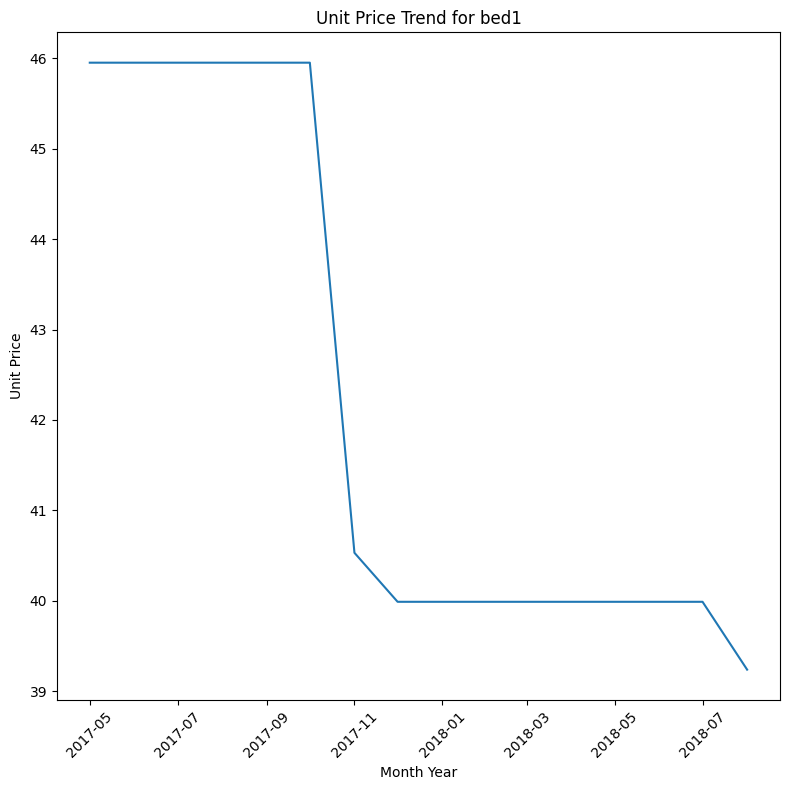

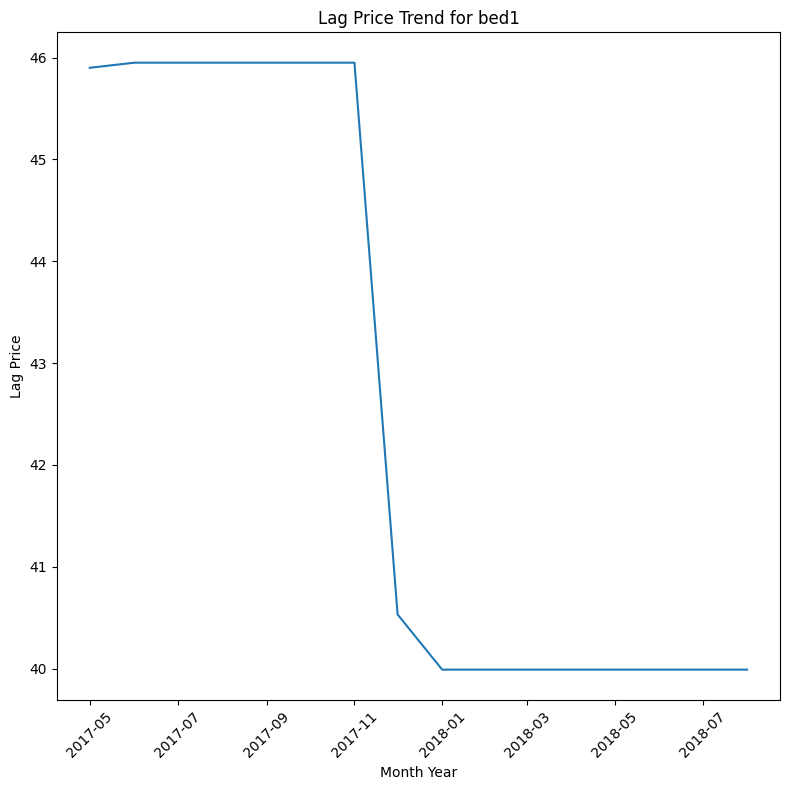

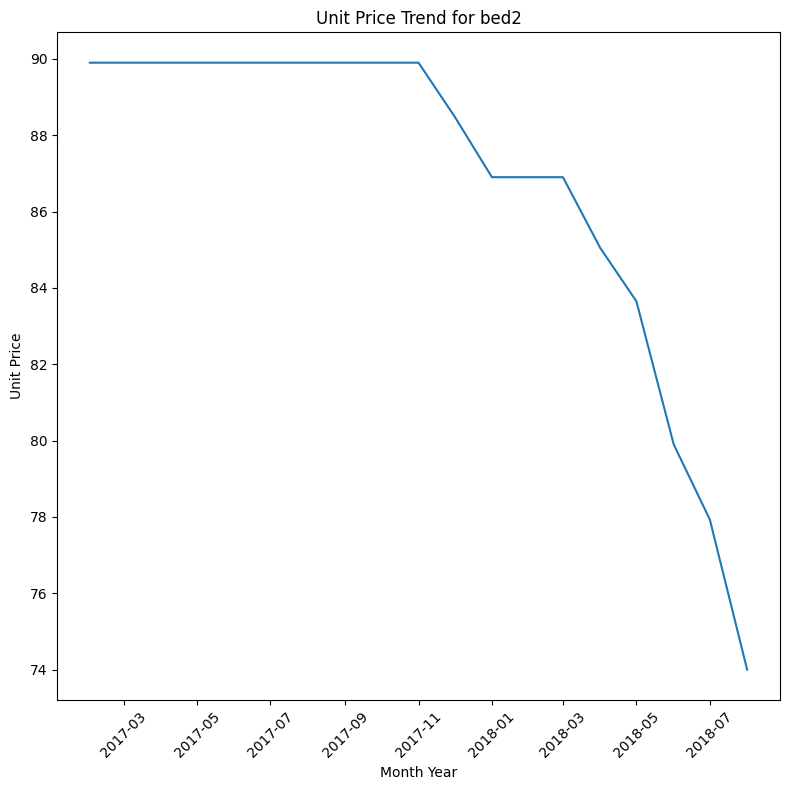

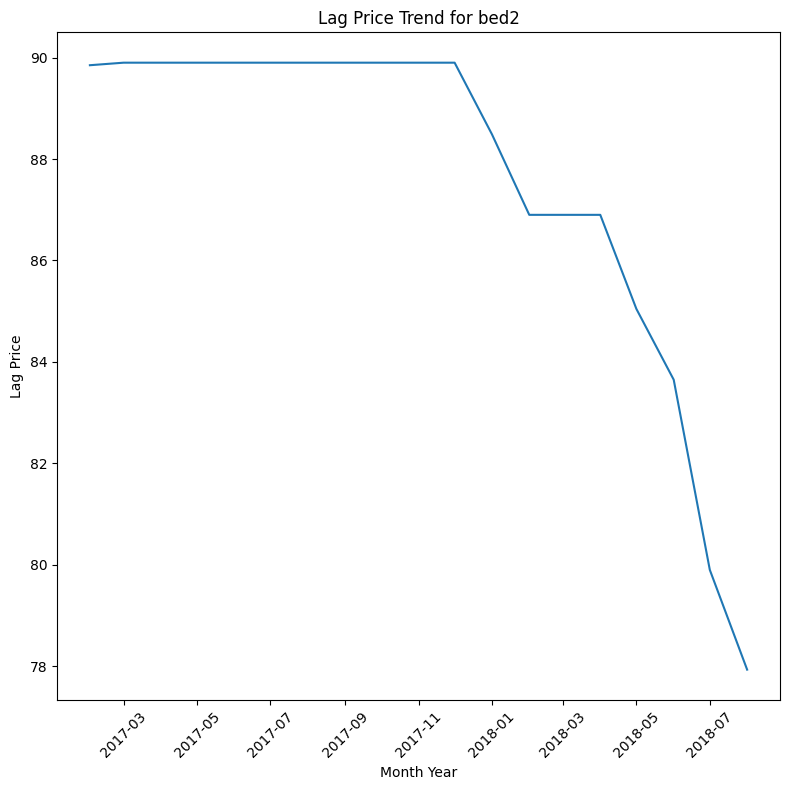

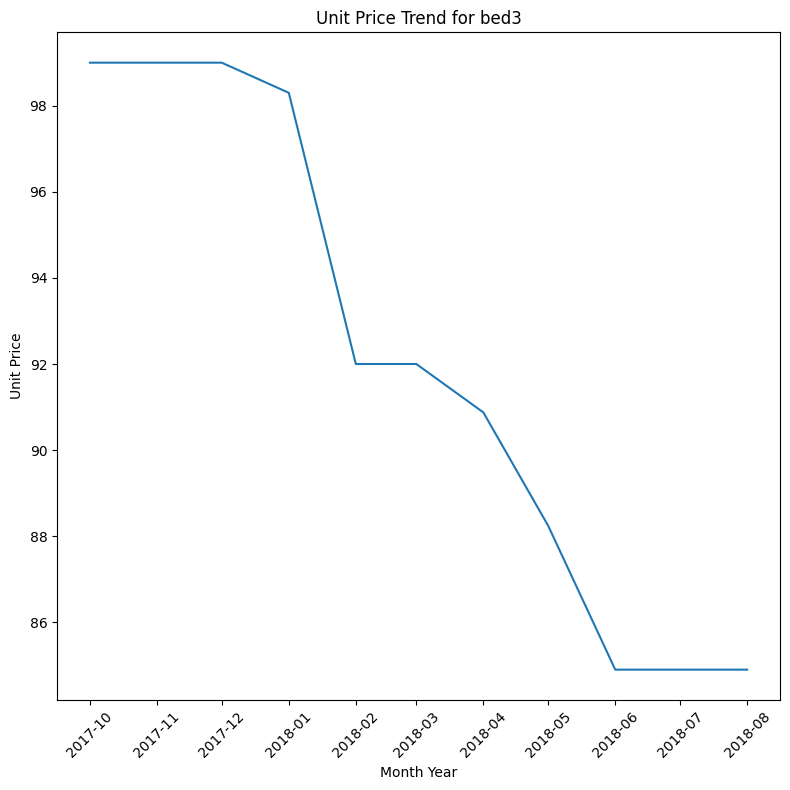

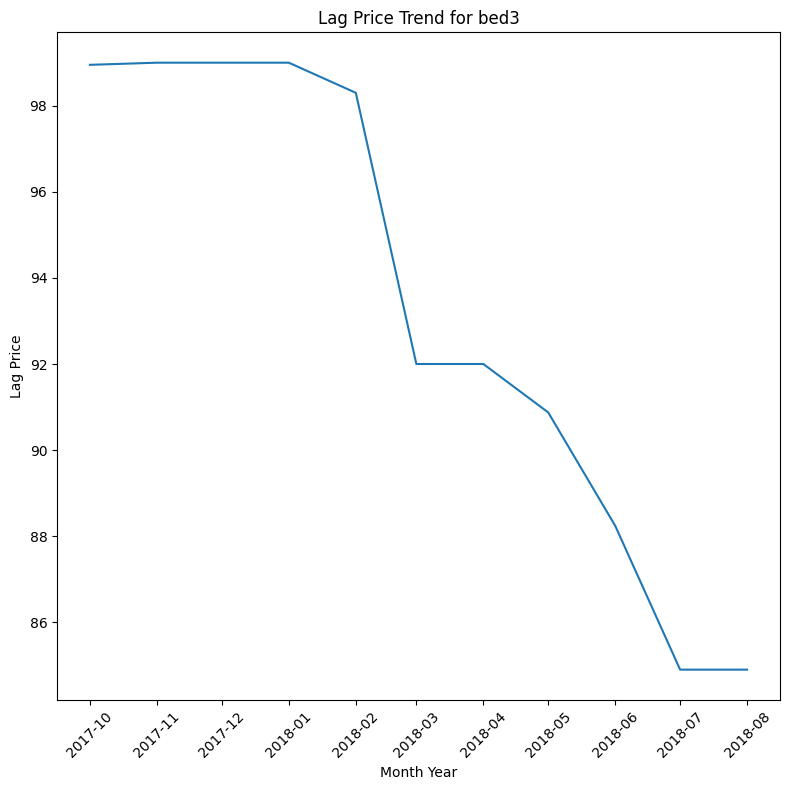

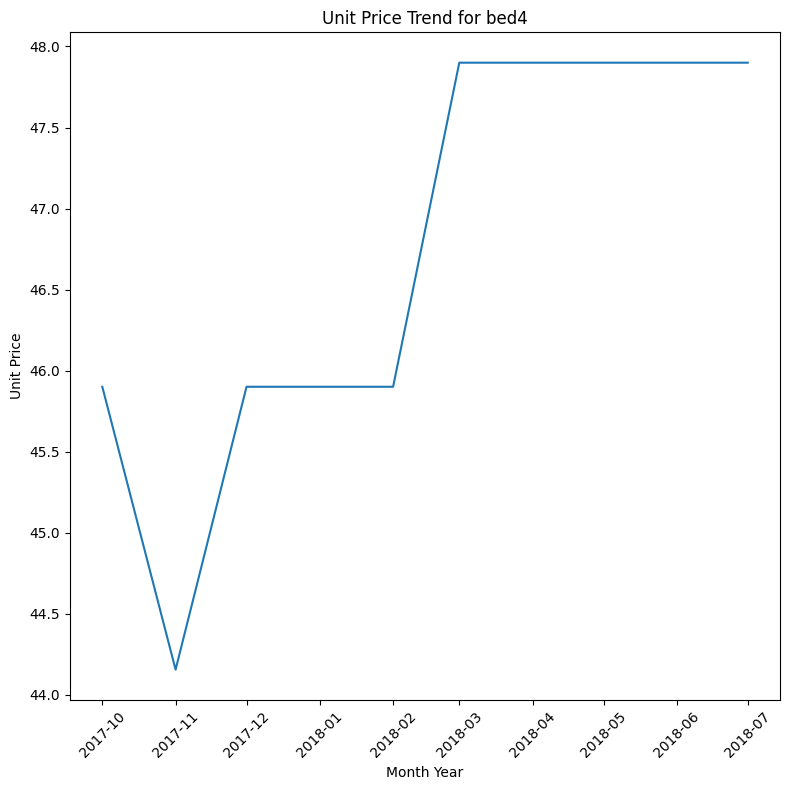

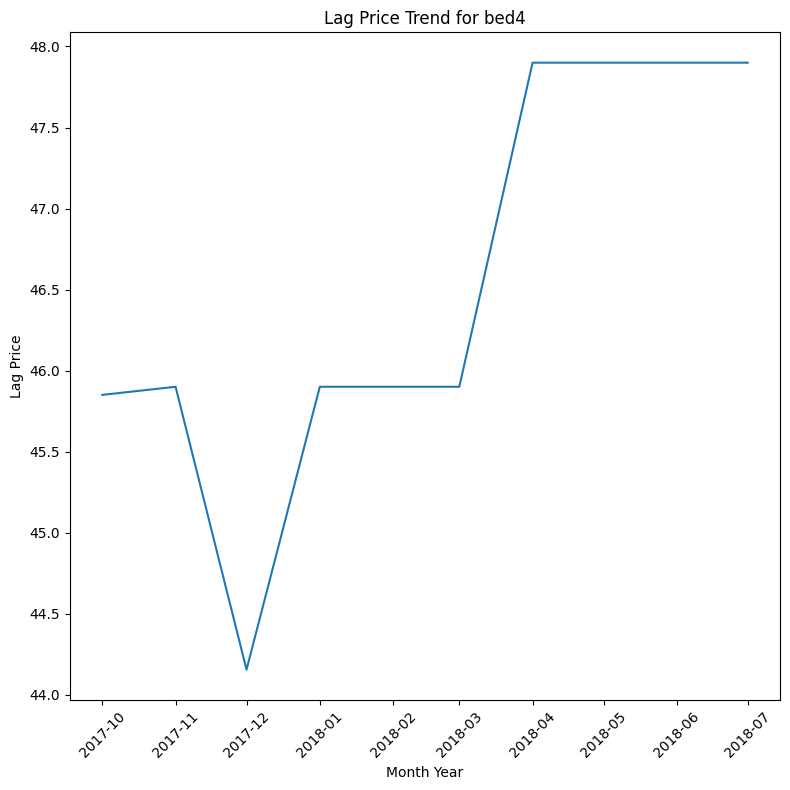

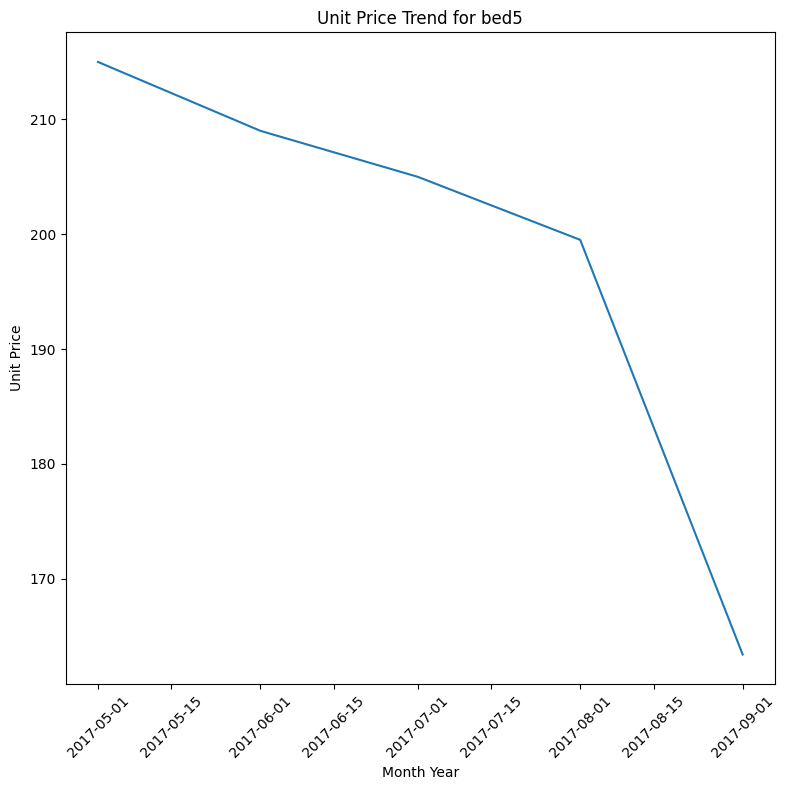

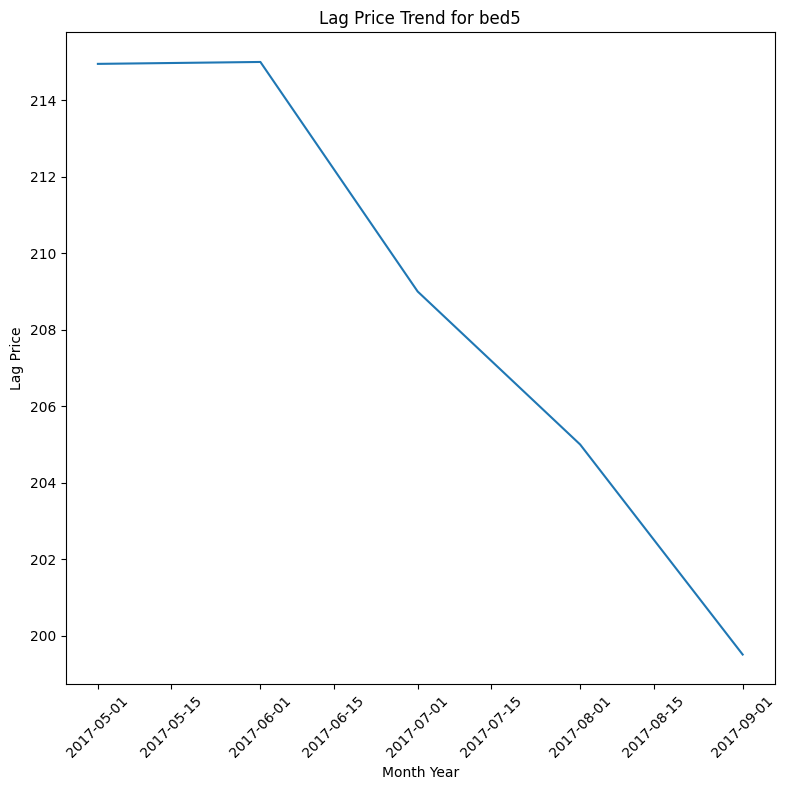

In [ ]:
# Iterate through each product ID in the selected_products list
for product_id in selected_products:
    product_df = grouped_df[grouped_df['product_id'] == product_id]

    plt.figure(figsize=(8, 8))
    # Create a lineplot to analyse unit price over month. (excellent for visualizing trends and changes in data over time)
    sns.lineplot(data=product_df, x='month_year', y='unit_price')
    plt.title(f'Unit Price Trend for {product_id}')
    plt.xlabel('Month Year')
    plt.ylabel('Unit Price')
    plt.xticks(rotation=45)                                       # Rotate the x-axis labels for better readability
    plt.tight_layout()                                            # prevent labels from overlapping
    plt.show()

    plt.figure(figsize=(8, 8))
    sns.lineplot(data=product_df, x='month_year', y='lag_price')  # Create a lineplot to analyse lag price over time.
    plt.title(f'Lag Price Trend for {product_id}')
    plt.xlabel('Month Year')
    plt.ylabel('Lag Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

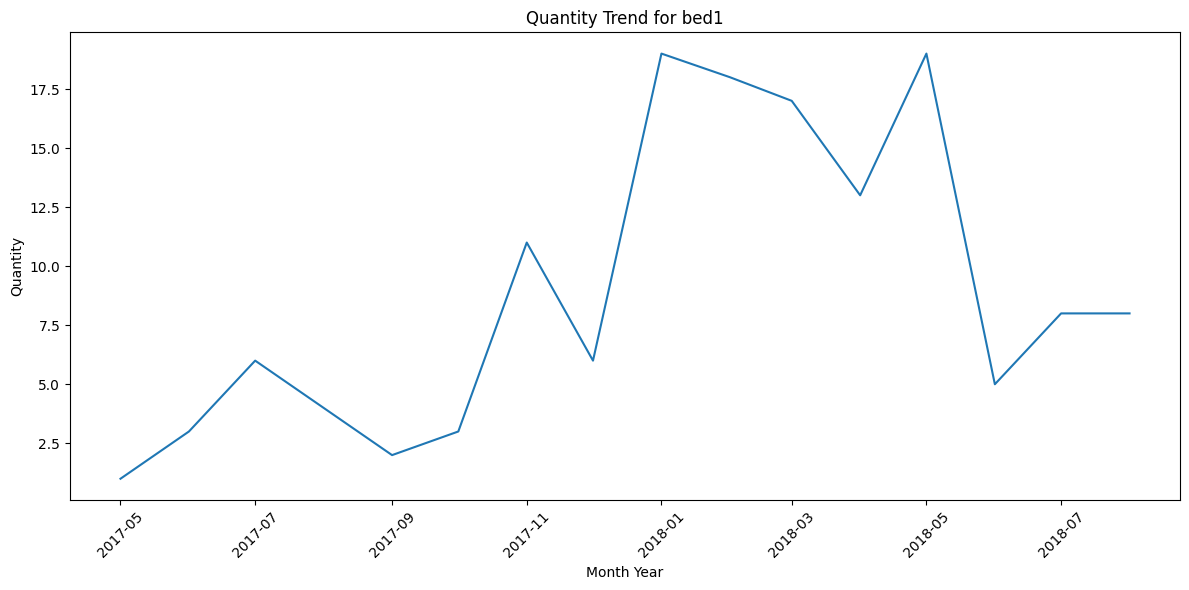

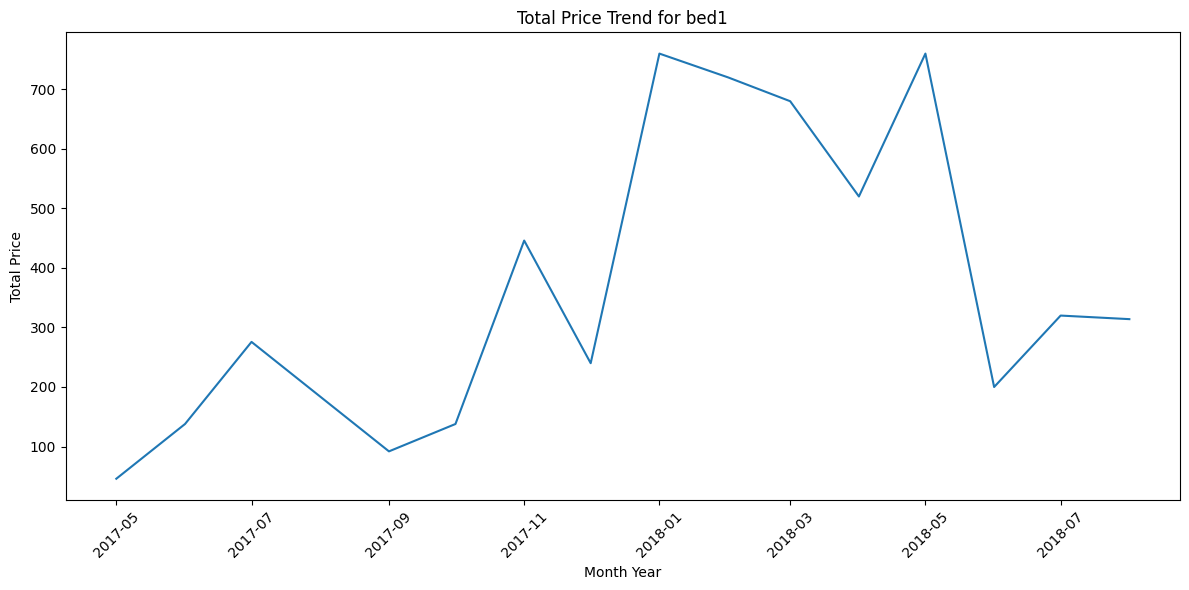

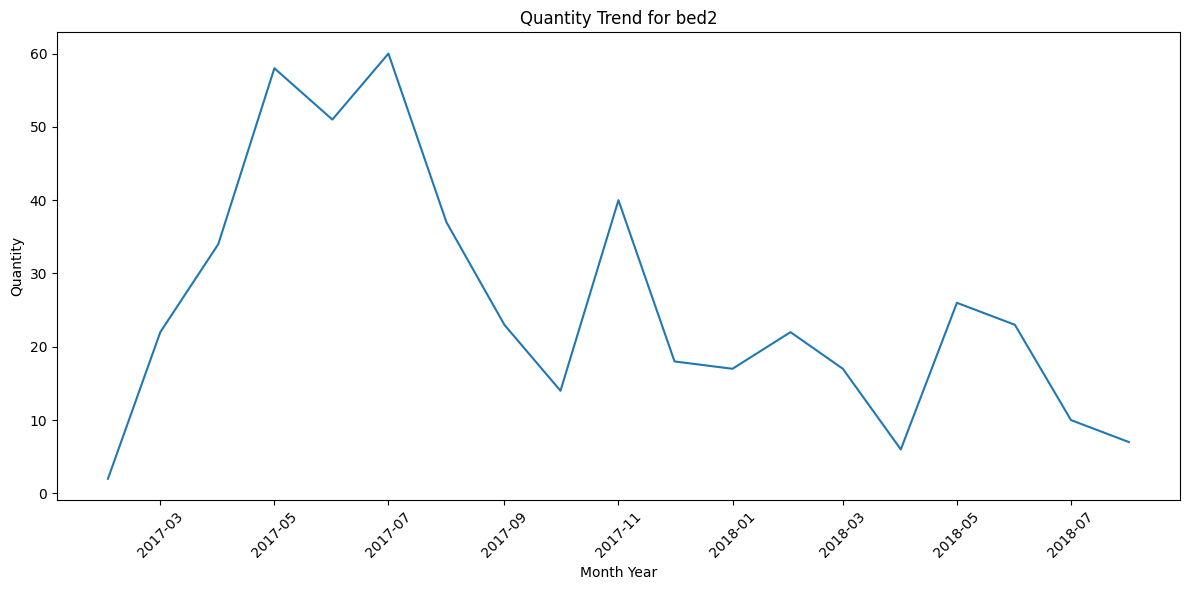

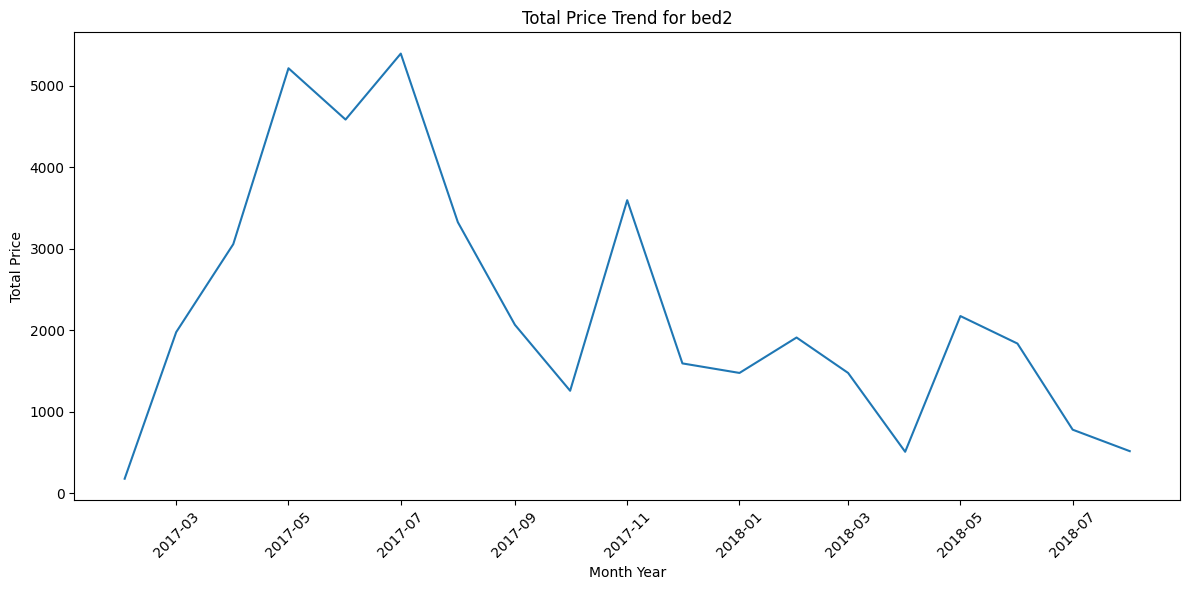

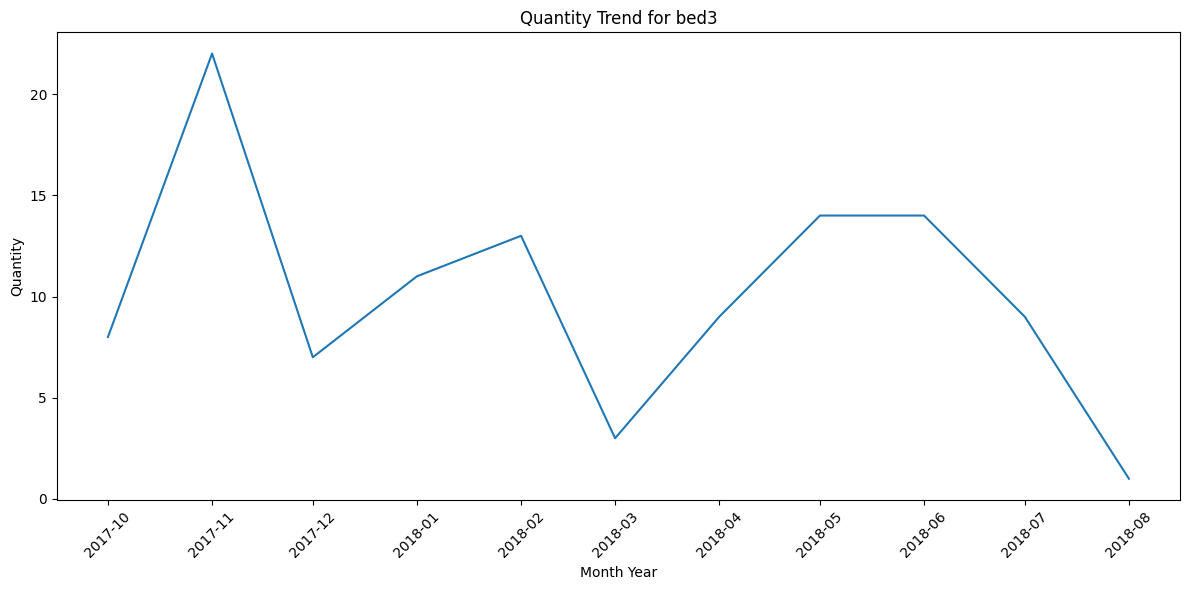

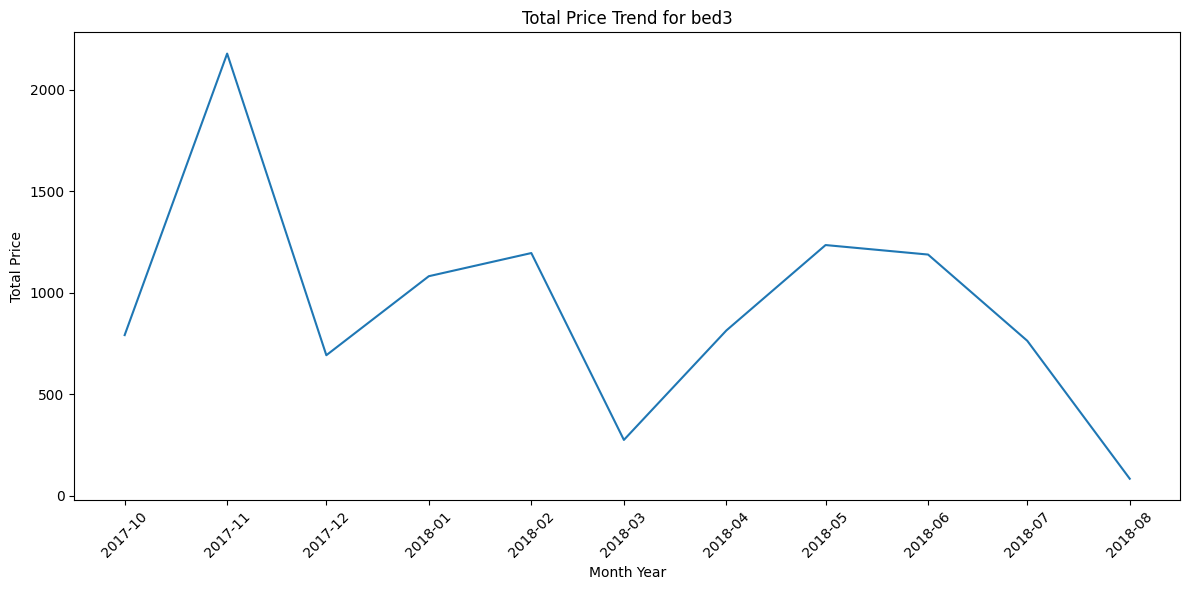

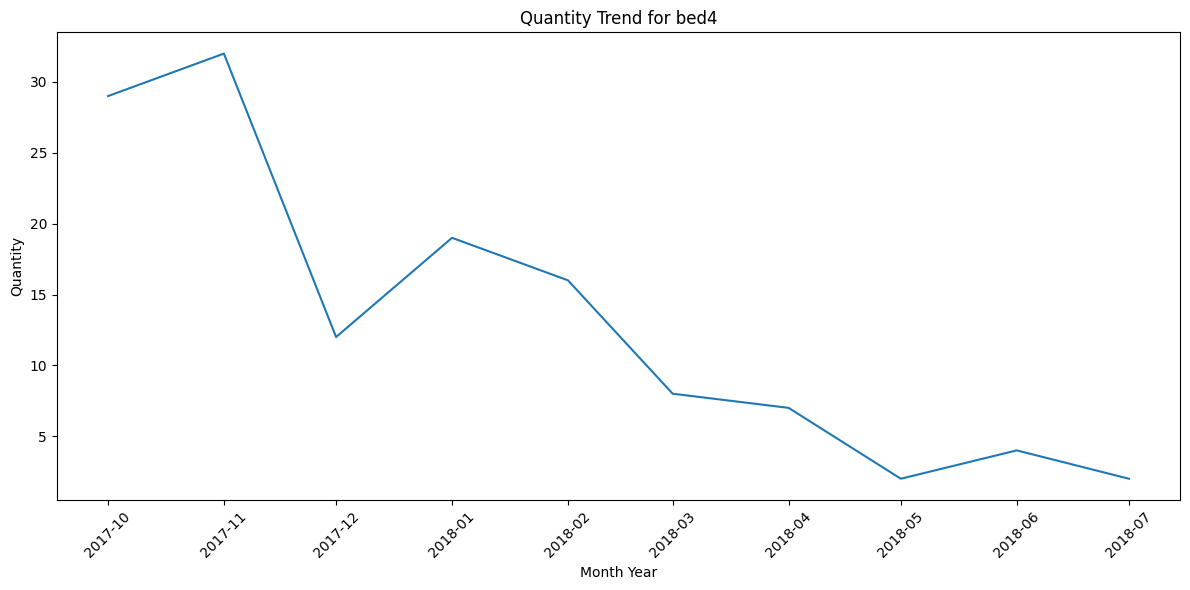

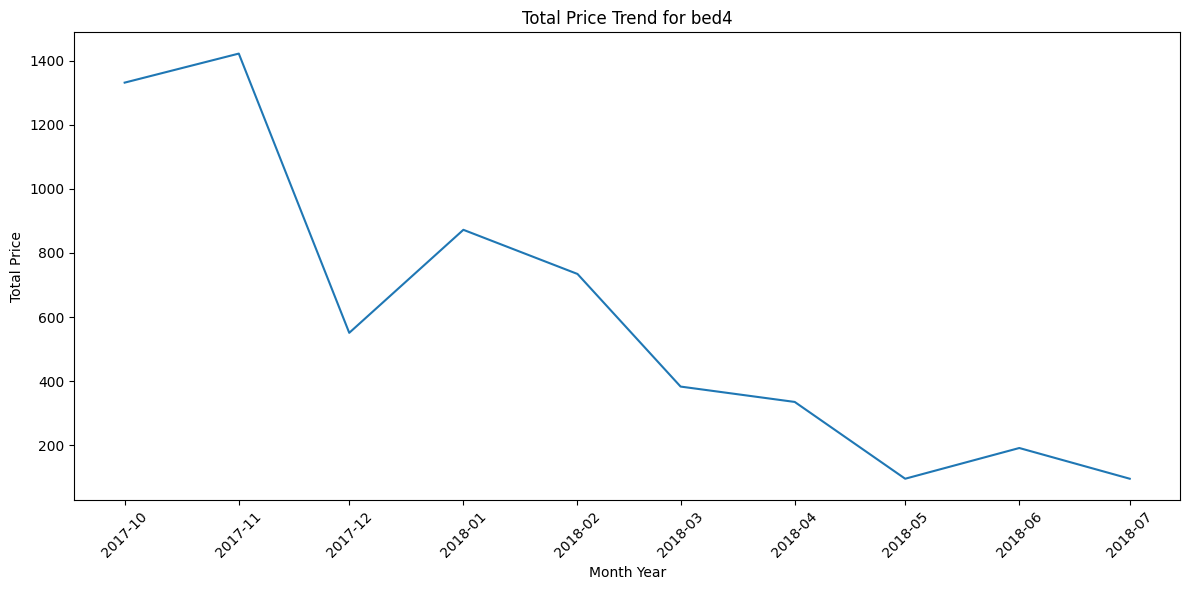

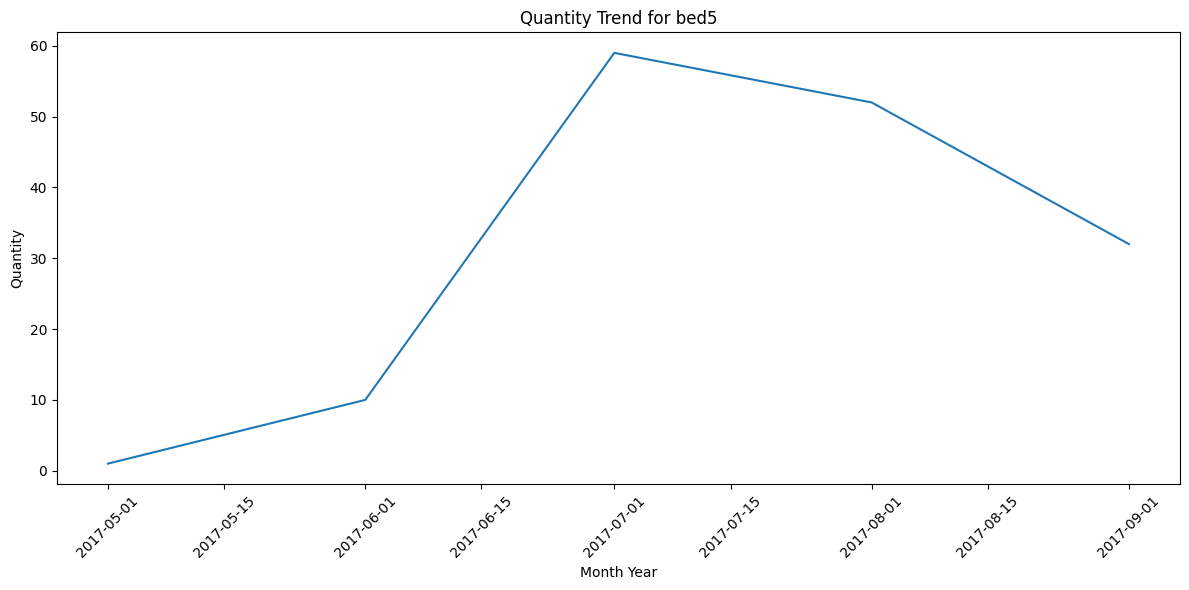

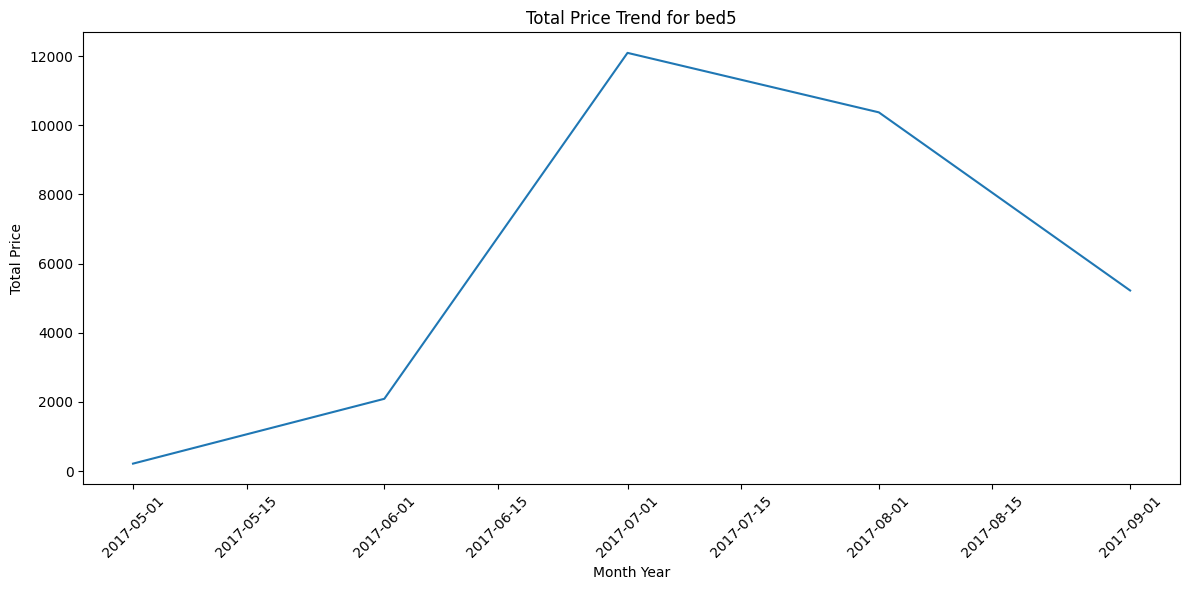

In [ ]:
for product_id in selected_products:
    product_df = grouped_df[grouped_df['product_id'] == product_id]

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=product_df, x='month_year', y='qty') # Create a lineplot to analyse qty over month.
    plt.title(f'Quantity Trend for {product_id}')
    plt.xlabel('Month Year')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=product_df, x='month_year', y='total_price') # Create a lineplot to analyse total price over month.
    plt.title(f'Total Price Trend for {product_id}')
    plt.xlabel('Month Year')
    plt.ylabel('Total Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

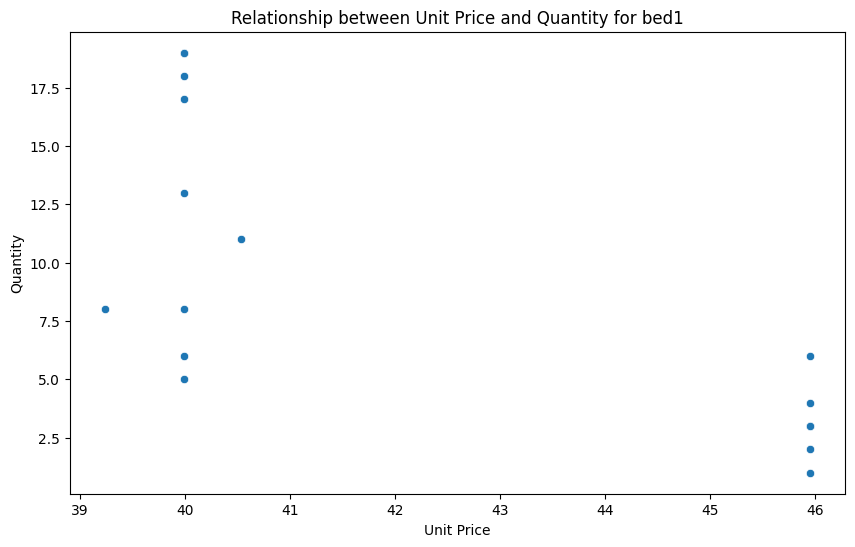

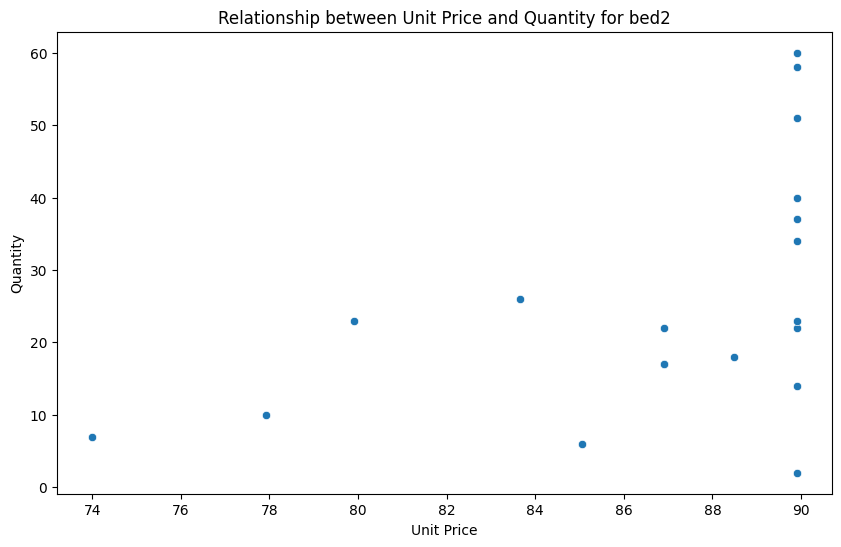

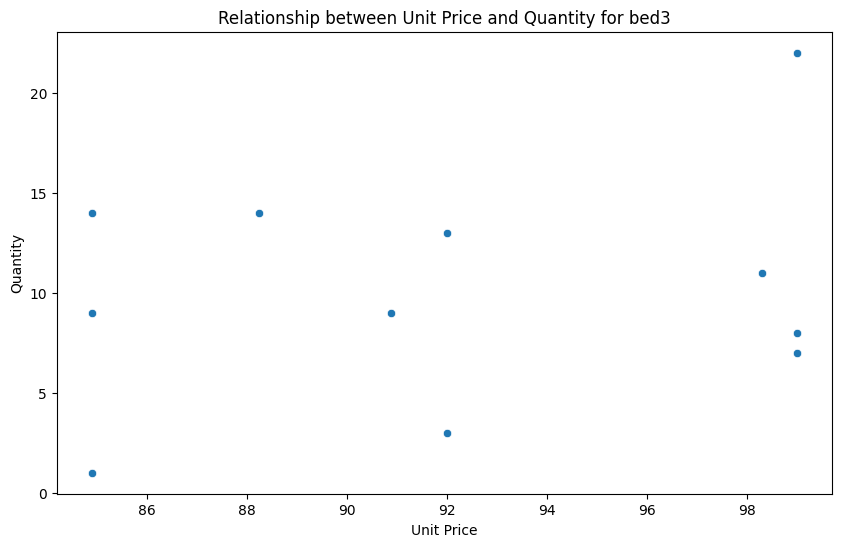

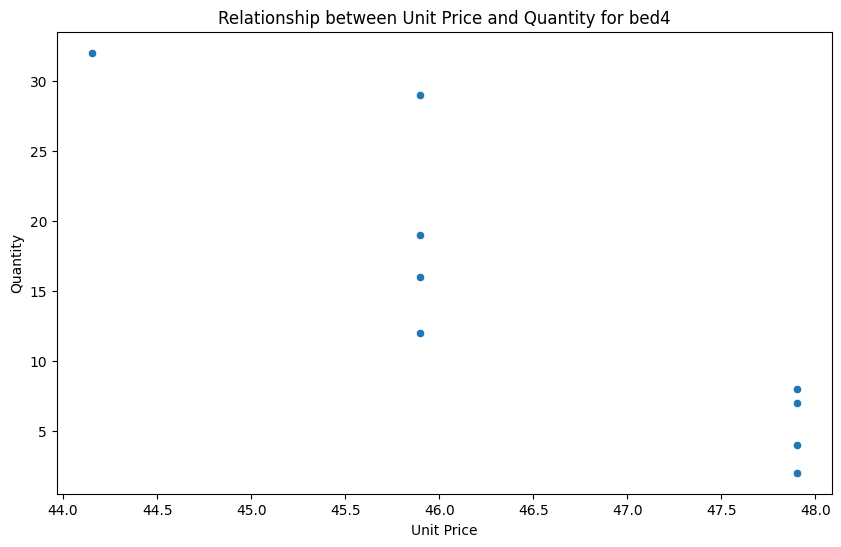

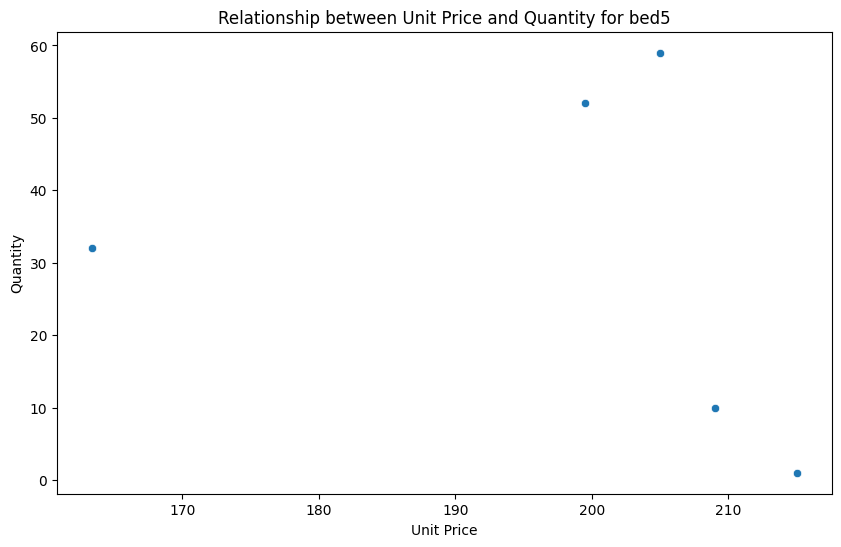

In [ ]:
for product_id in selected_products:
    product_df = grouped_df[grouped_df['product_id'] == product_id]

    plt.figure(figsize=(10, 6))
    # Create a scatterplot to analyse qty over unit price for selected products. (useful for checking the relationship b/w the 2 at specifc pts in time rather than over time)
    sns.scatterplot(data=product_df, x='unit_price', y='qty')
    plt.title(f'Relationship between Unit Price and Quantity for {product_id}')
    plt.xlabel('Unit Price')
    plt.ylabel('Quantity')
    plt.show()

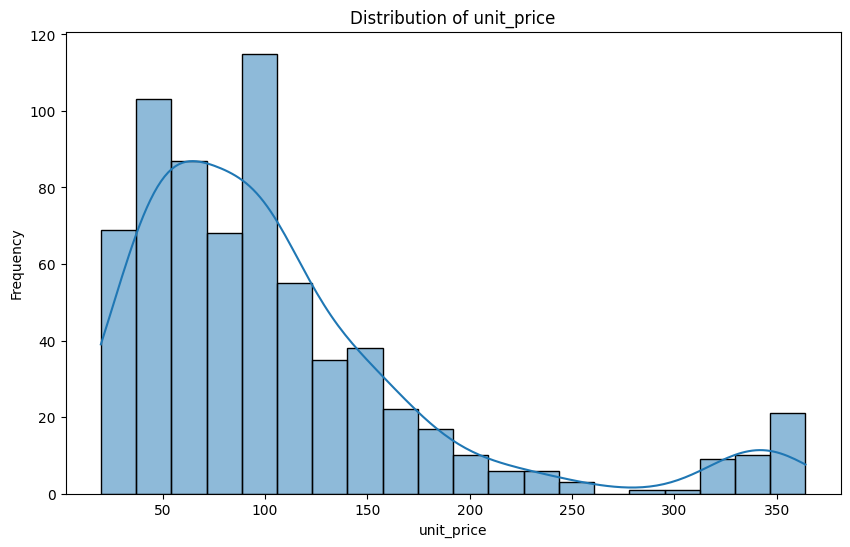

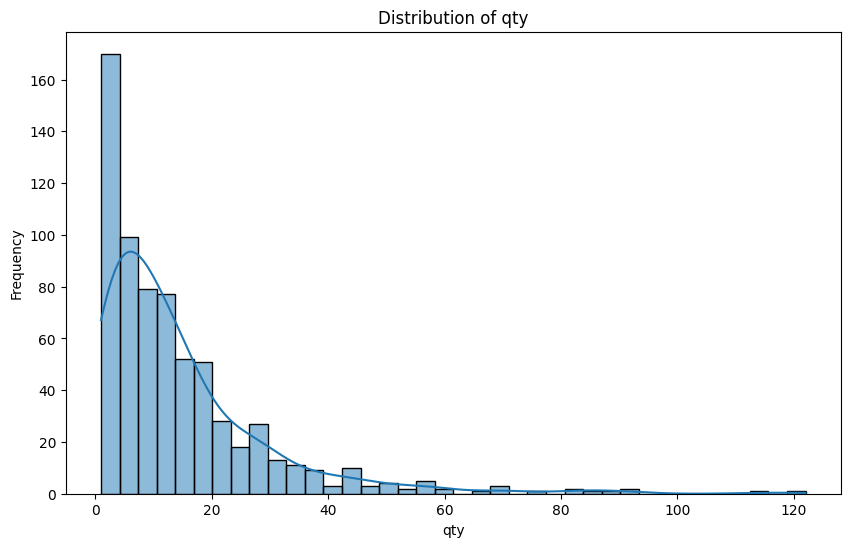

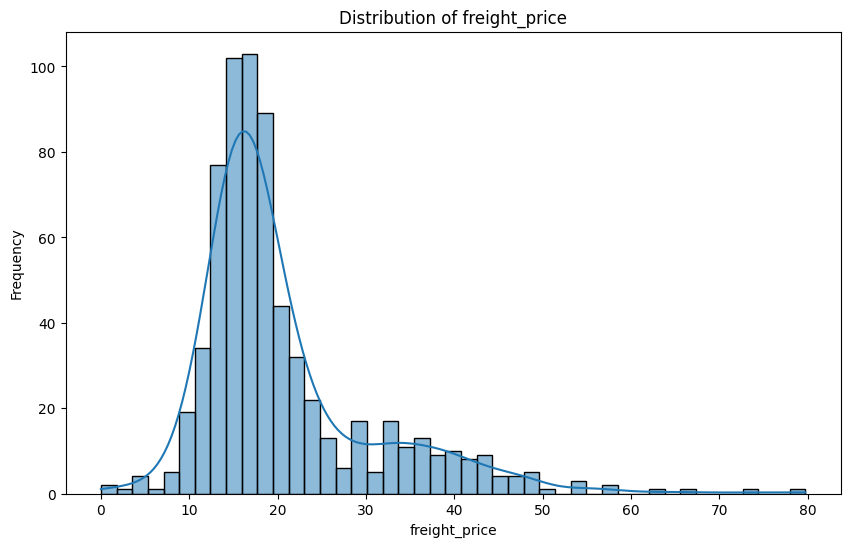

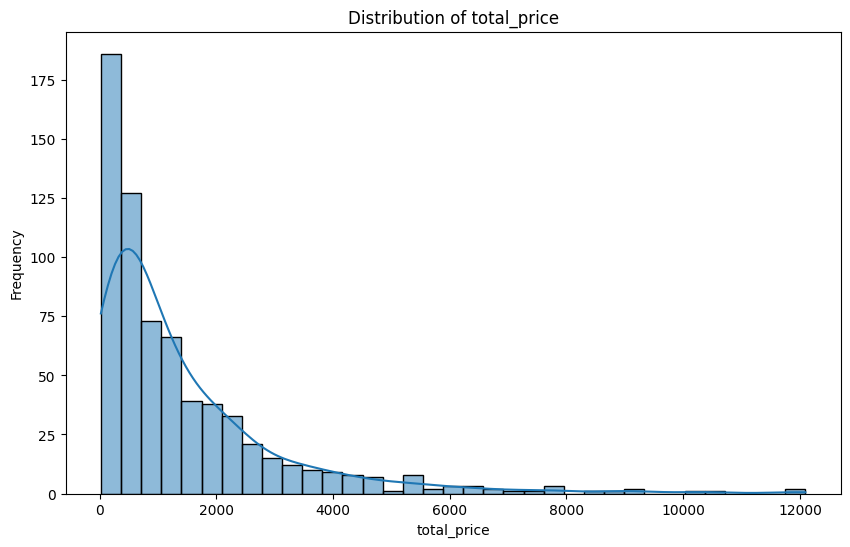

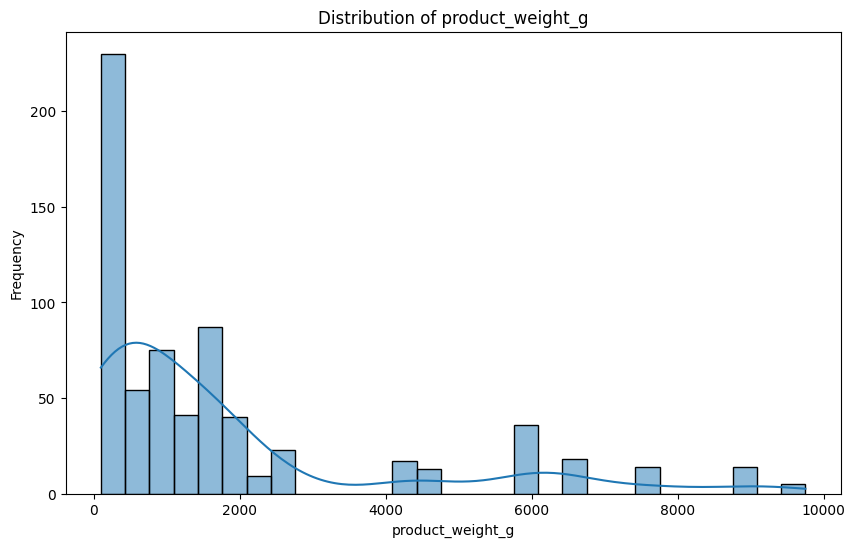

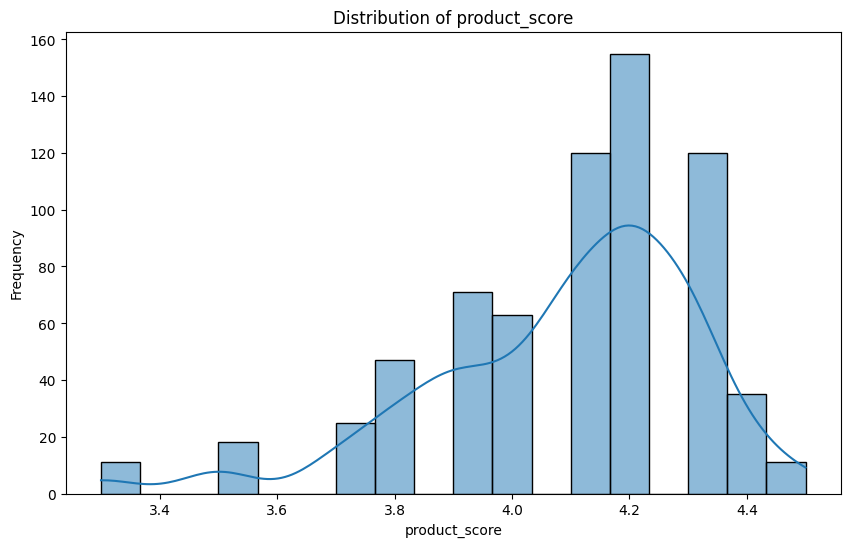

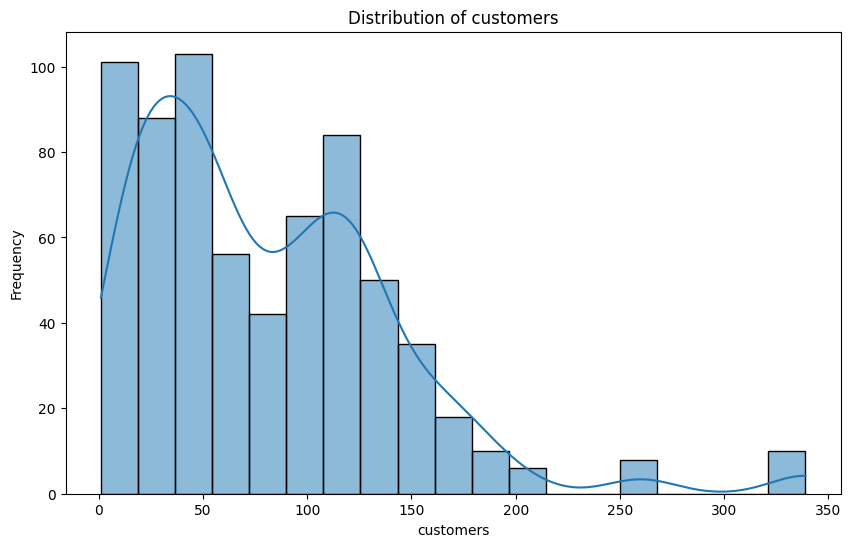

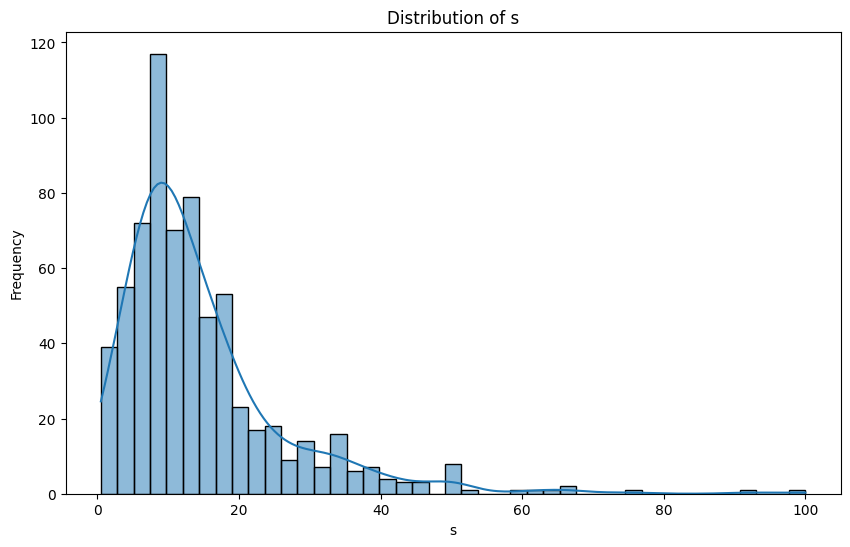

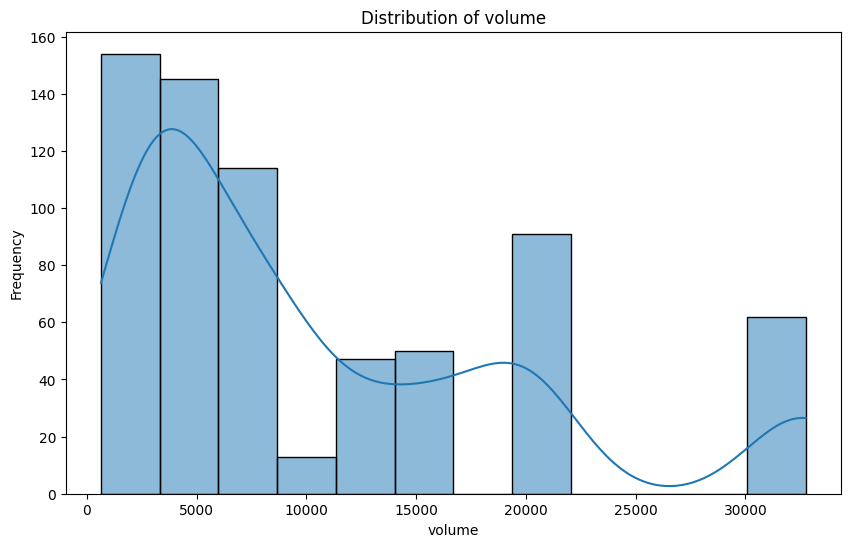

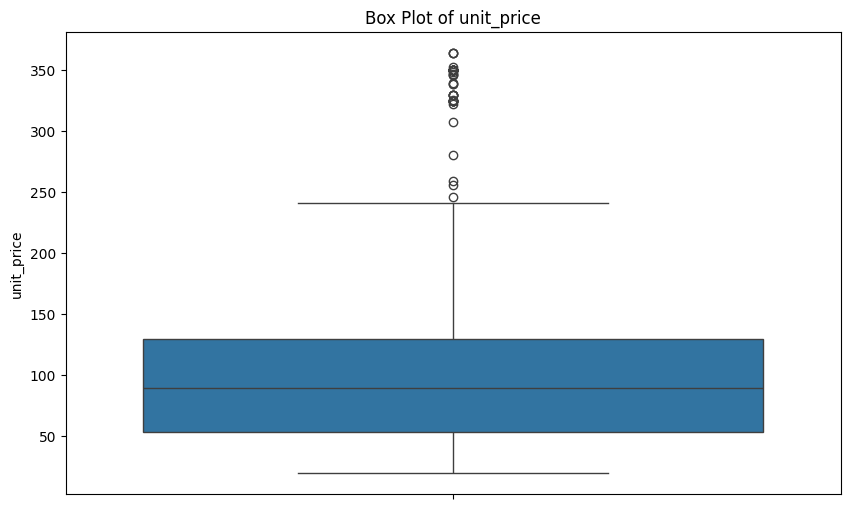

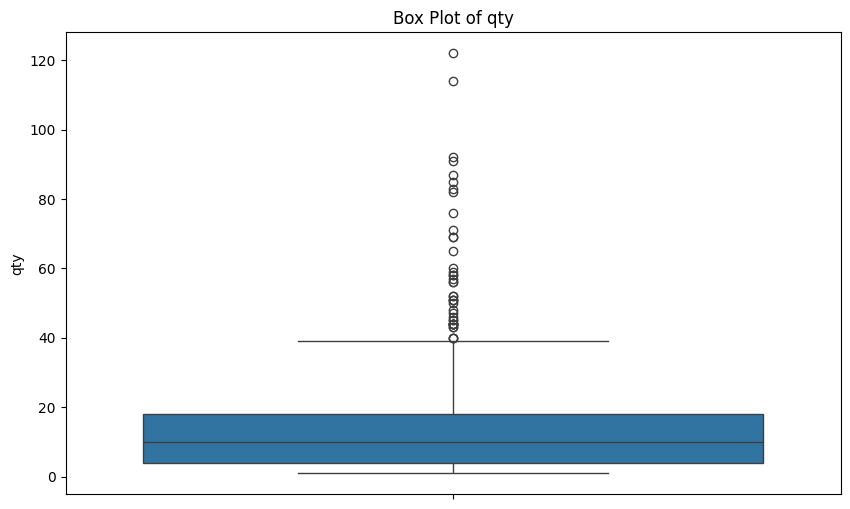

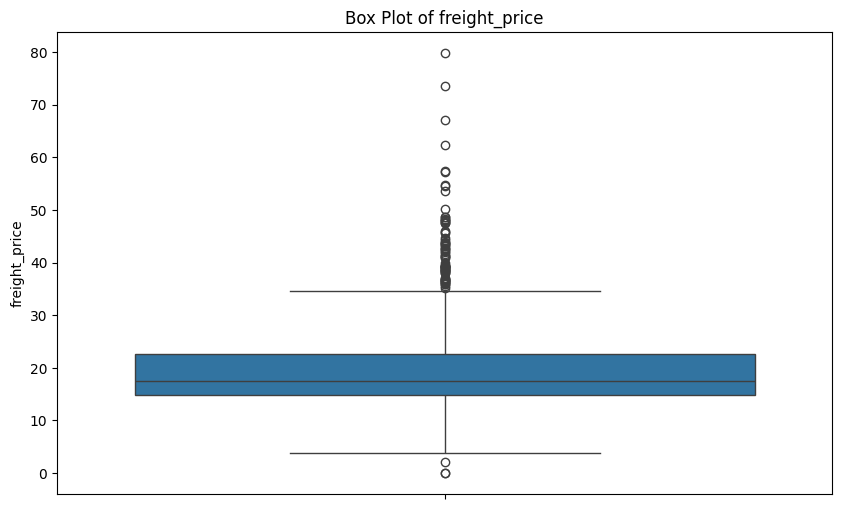

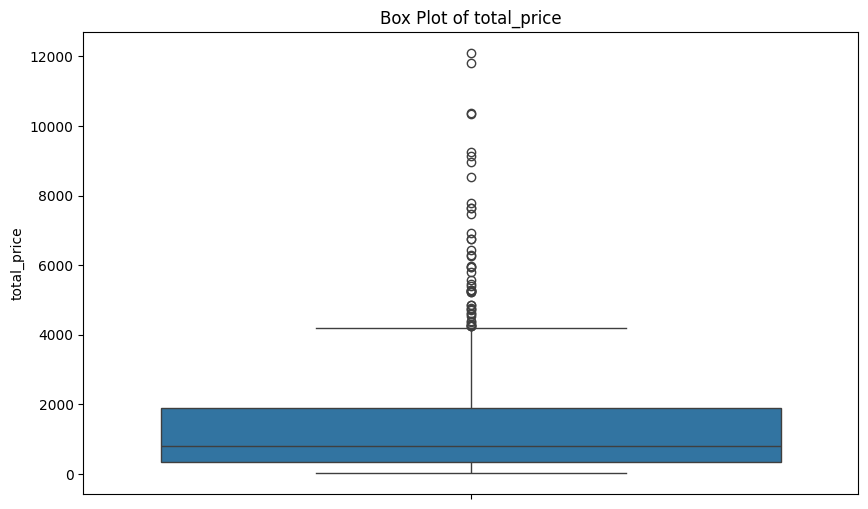

In [ ]:
# Select key numerical variables for distribution analysis
numerical_vars = ['unit_price', 'qty', 'freight_price', 'total_price',
                  'product_weight_g', 'product_score', 'customers', 's', 'volume']

# Create histograms for numerical vars. (to better understand relation b/w single variables)
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=grouped_df, x=var, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

# Create subset of key numerical variables for box plots (checking outliers, medians, quartiles is most insightful for understanding price, qty, cost)
box_plot_vars = ['unit_price', 'qty', 'freight_price', 'total_price']

# Create box plots for a subset of key numerical variables. (to better understand the range of var and highlight outliers)
for var in box_plot_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=grouped_df, y=var)
    plt.title(f'Box Plot of {var}')
    plt.ylabel(var)
    plt.show()

In [ ]:
# Winsorize the specified columns to handle outliers. (used to limit extreme values in the dataset, instead of removing we are replacing them with values at a specified percentile)
winsorize_cols = ['unit_price', 'qty', 'freight_price', 'total_price']

# Define the percentile thresholds (5th and 95th percentiles)
lower_percentile = 0.05
upper_percentile = 0.95

# Apply winsorizing to the selected columns
for col in winsorize_cols:
    # Calculate the lower and upper bounds for winsorizing
    lower_bound = grouped_df[col].quantile(lower_percentile)
    upper_bound = grouped_df[col].quantile(upper_percentile)

    # Apply winsorizing
    grouped_df[col] = grouped_df[col].clip(lower=lower_bound, upper=upper_bound)

# Display the descriptive stats after winsorizing to see the effect on min/max values
grouped_df[winsorize_cols].describe()

,unit_price,qty,freight_price,total_price
count,676.000000,676.000000,676.000000,676.000000
mean,105.845353,13.483728,20.429631,1313.751945
std,72.701174,11.726818,8.582278,1300.043431
min,29.900000,1.000000,10.978500,99.987500
25%,53.900000,4.000000,14.761912,333.700000
50%,89.900000,10.000000,17.518472,807.890000
75%,129.990000,18.000000,22.713558,1887.322500
max,325.000000,44.000000,42.077857,4756.425000


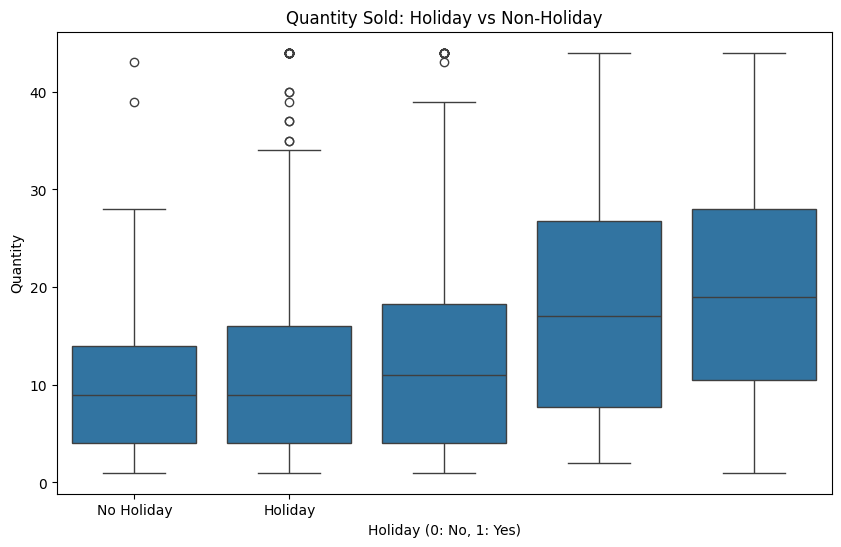

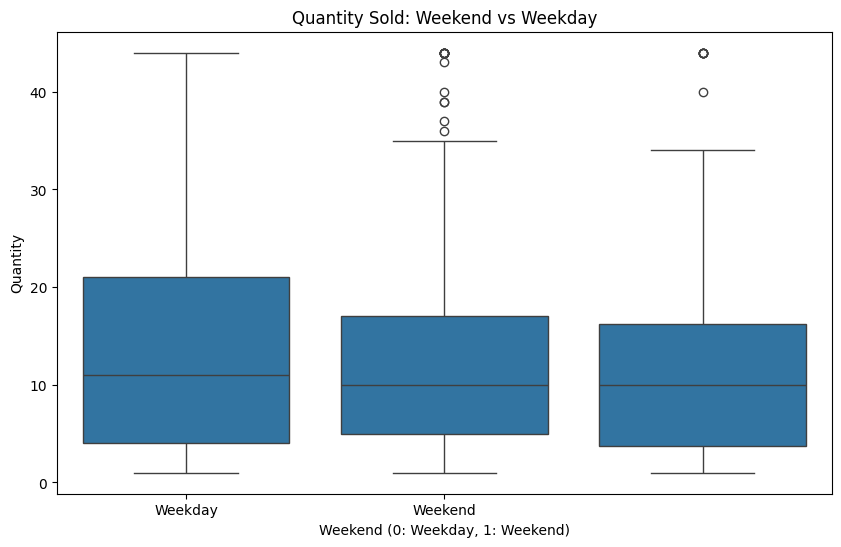

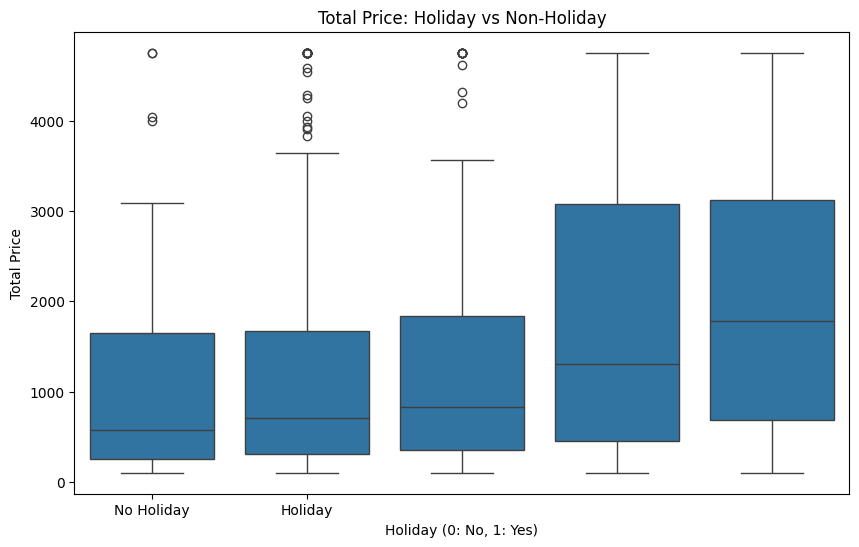

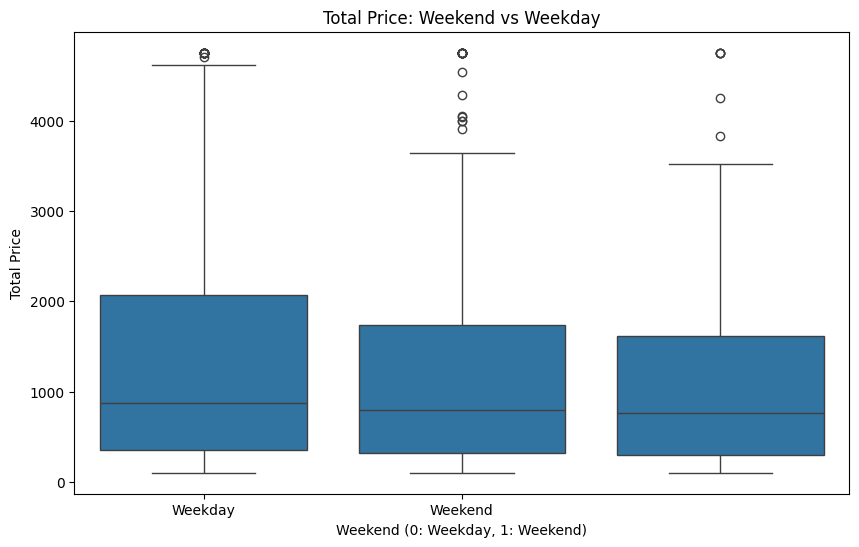

In [ ]:
# Create box plot for quantity sold during holidays vs non-holidays
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_df, x='holiday', y='qty')
plt.title('Quantity Sold: Holiday vs Non-Holiday')
plt.xlabel('Holiday (0: No, 1: Yes)')
plt.ylabel('Quantity')
plt.xticks([0, 1], ['No Holiday', 'Holiday'])
plt.show()

# Create box plot for quantity sold during weekends vs weekdays
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_df, x='weekend', y='qty')
plt.title('Quantity Sold: Weekend vs Weekday')
plt.xlabel('Weekend (0: Weekday, 1: Weekend)')
plt.ylabel('Quantity')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

# Create box plot for total price during holidays vs non-holidays
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_df, x='holiday', y='total_price')
plt.title('Total Price: Holiday vs Non-Holiday')
plt.xlabel('Holiday (0: No, 1: Yes)')
plt.ylabel('Total Price')
plt.xticks([0, 1], ['No Holiday', 'Holiday'])
plt.show()

# Create box plot for total price during weekends vs weekdays
plt.figure(figsize=(10, 6))
sns.boxplot(data=grouped_df, x='weekend', y='total_price')
plt.title('Total Price: Weekend vs Weekday')
plt.xlabel('Weekend (0: Weekday, 1: Weekend)')
plt.ylabel('Total Price')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.show()

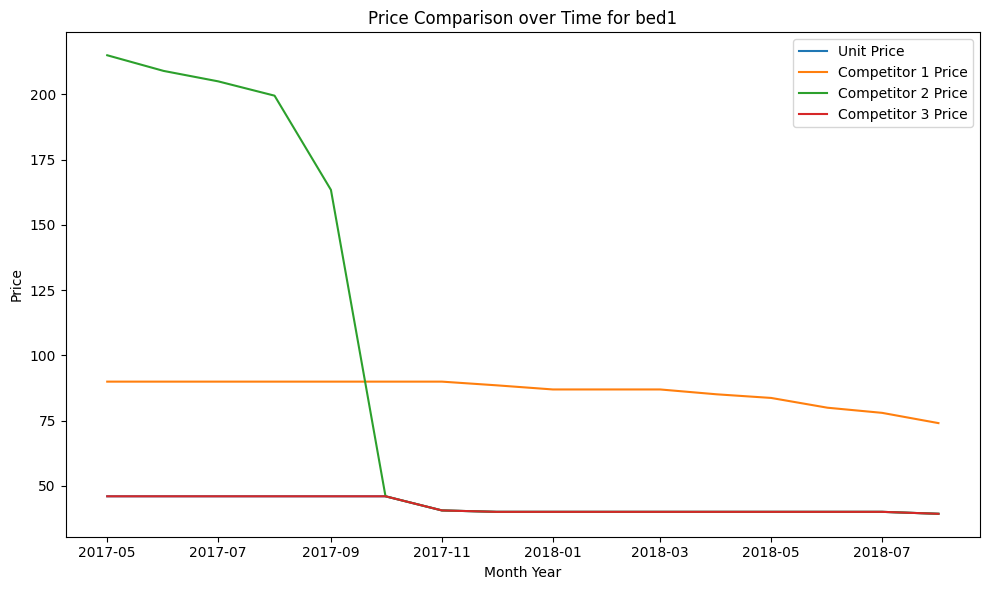

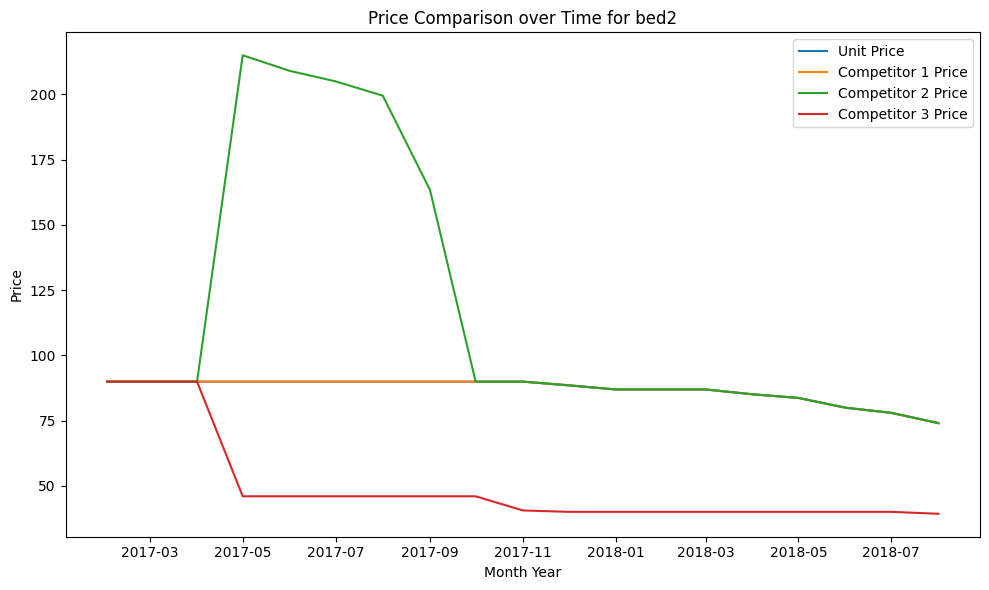

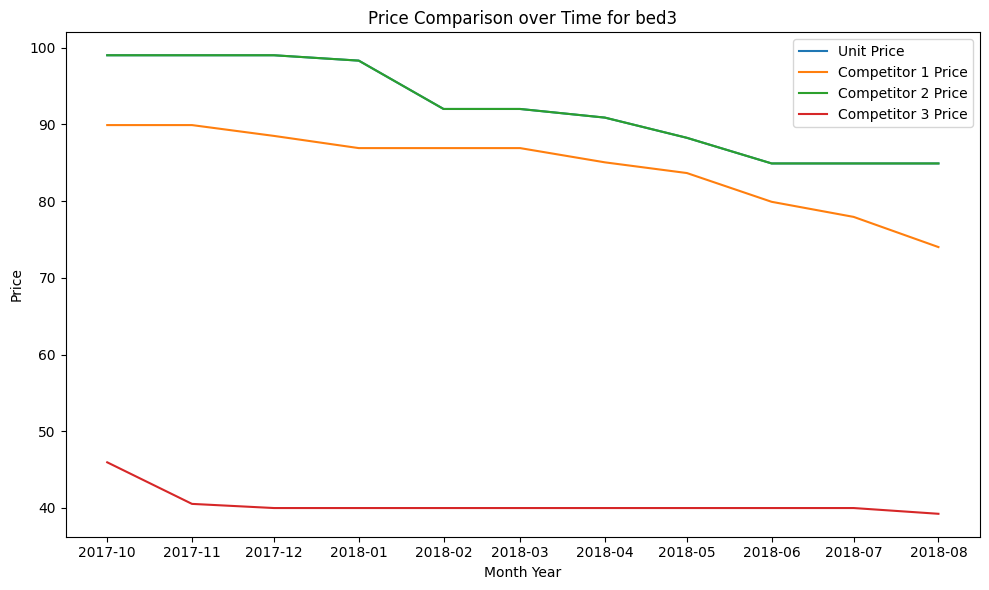

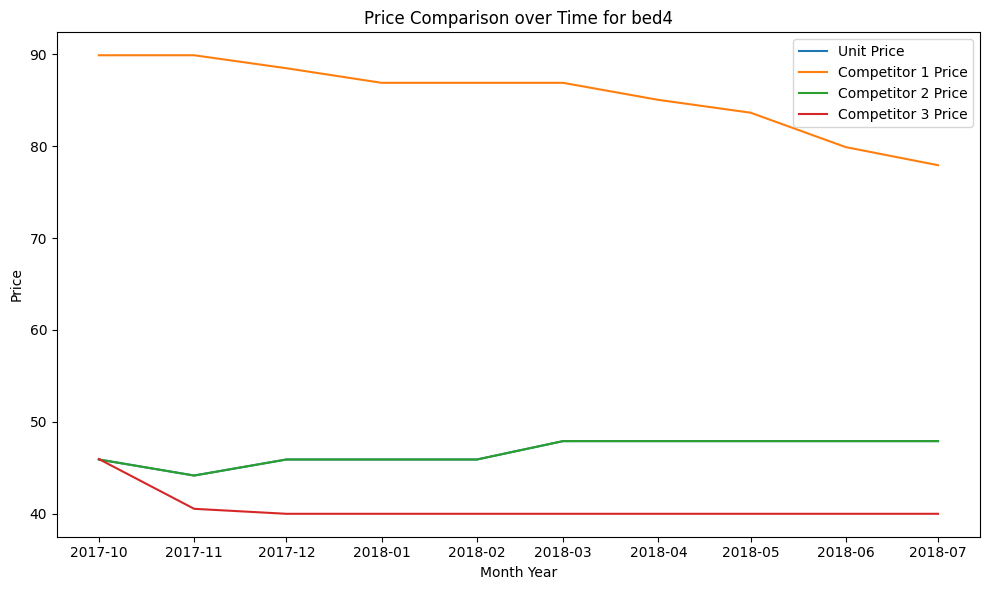

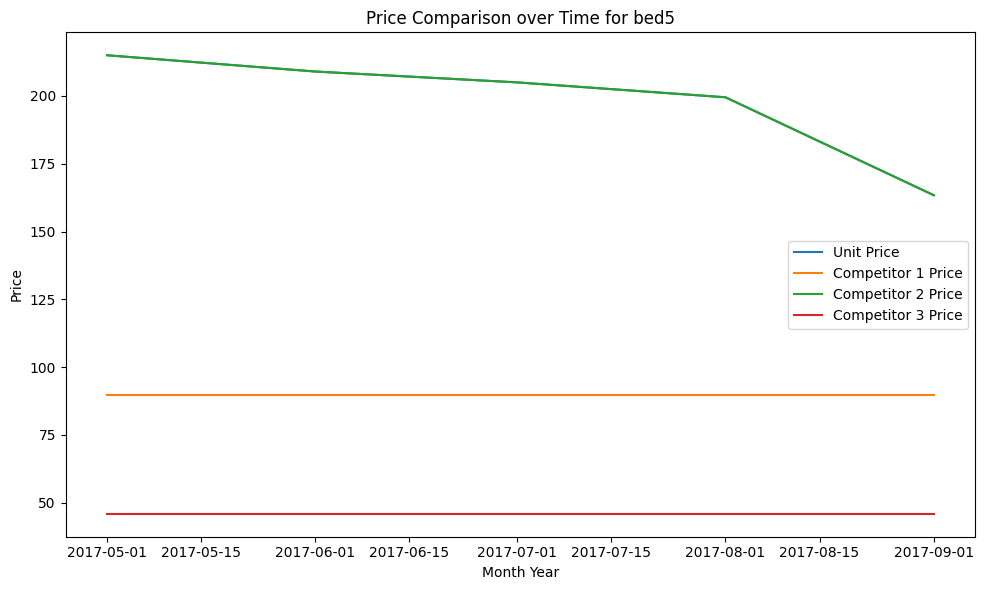

In [ ]:
for product_id in selected_products:
    product_df = grouped_df[grouped_df['product_id'] == product_id]

    plt.figure(figsize=(10, 6))
    # Create lineplots for unit price and comp price over time for each sel. product.
    sns.lineplot(data=product_df, x='month_year', y='unit_price', label='Unit Price')
    sns.lineplot(data=product_df, x='month_year', y='comp_1', label='Competitor 1 Price')
    sns.lineplot(data=product_df, x='month_year', y='comp_2', label='Competitor 2 Price')
    sns.lineplot(data=product_df, x='month_year', y='comp_3', label='Competitor 3 Price')
    plt.title(f'Price Comparison over Time for {product_id}')
    plt.xlabel('Month Year')
    plt.ylabel('Price')
    plt.legend()
    plt.tight_layout()
    plt.show()

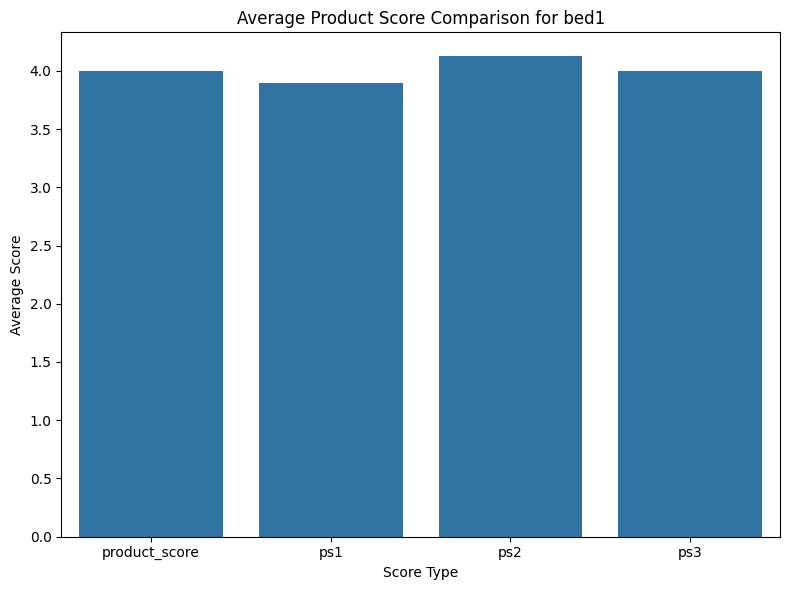

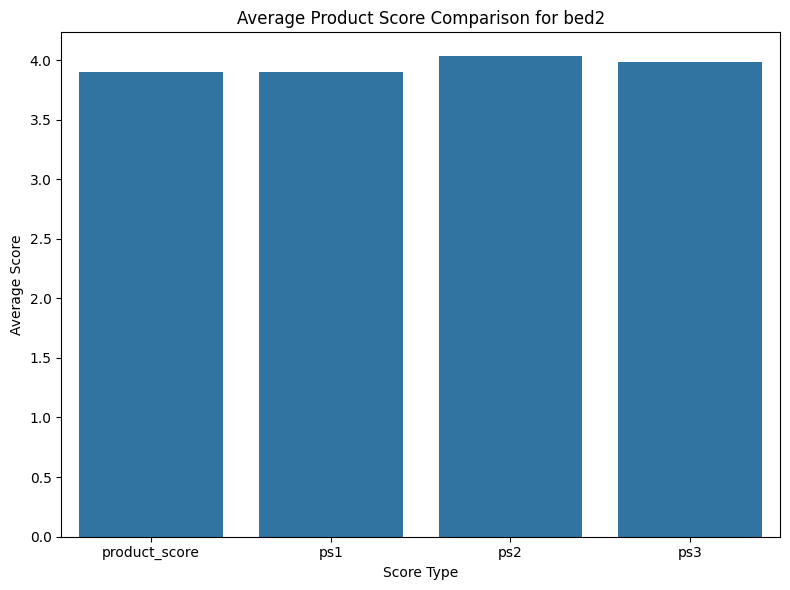

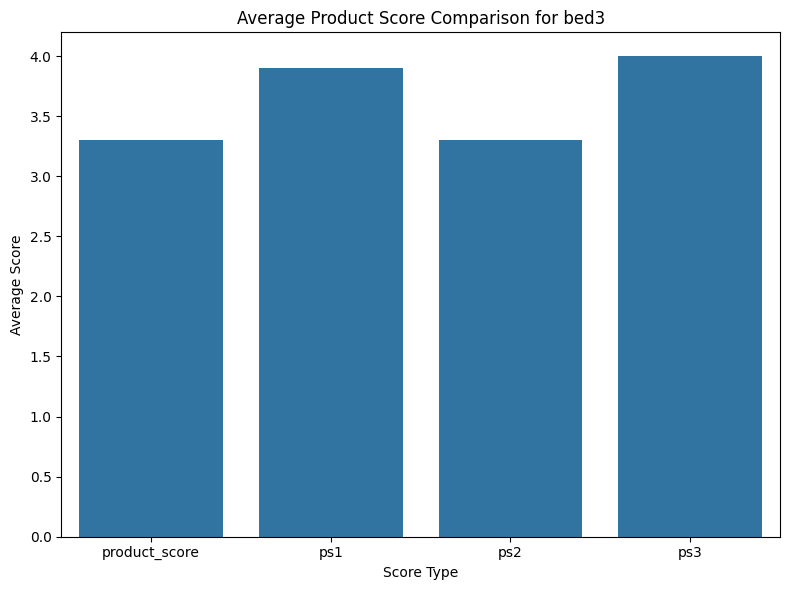

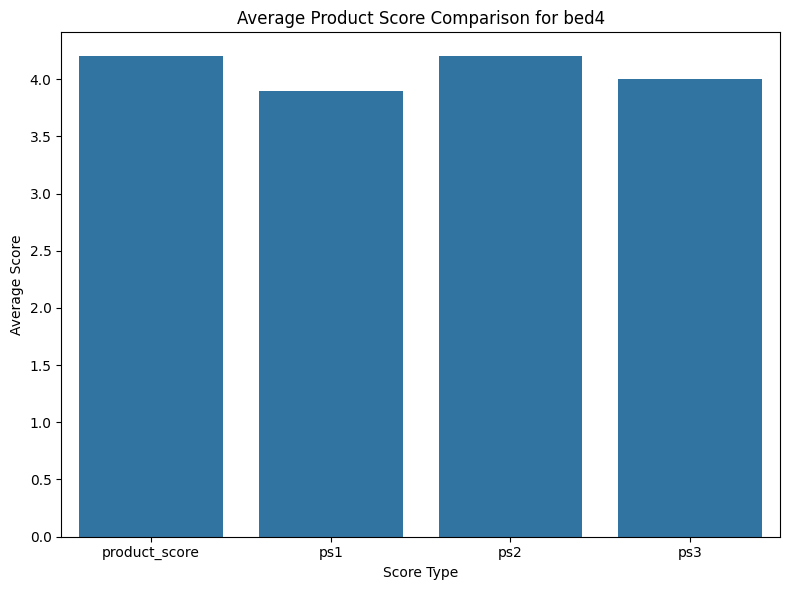

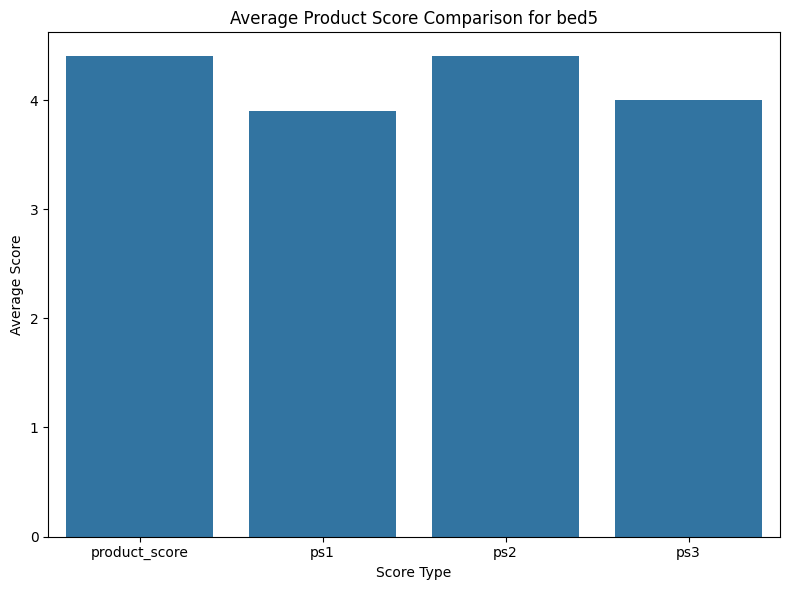

In [ ]:
# Create bar plots to compare the avg product score with competitor scores for each selected product.
for product_id in selected_products:
    product_df = grouped_df[grouped_df['product_id'] == product_id]

    avg_scores = product_df[['product_score', 'ps1', 'ps2', 'ps3']].mean()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=avg_scores.index, y=avg_scores.values)
    plt.title(f'Average Product Score Comparison for {product_id}')
    plt.ylabel('Average Score')
    plt.xlabel('Score Type')
    plt.tight_layout()
    plt.show()

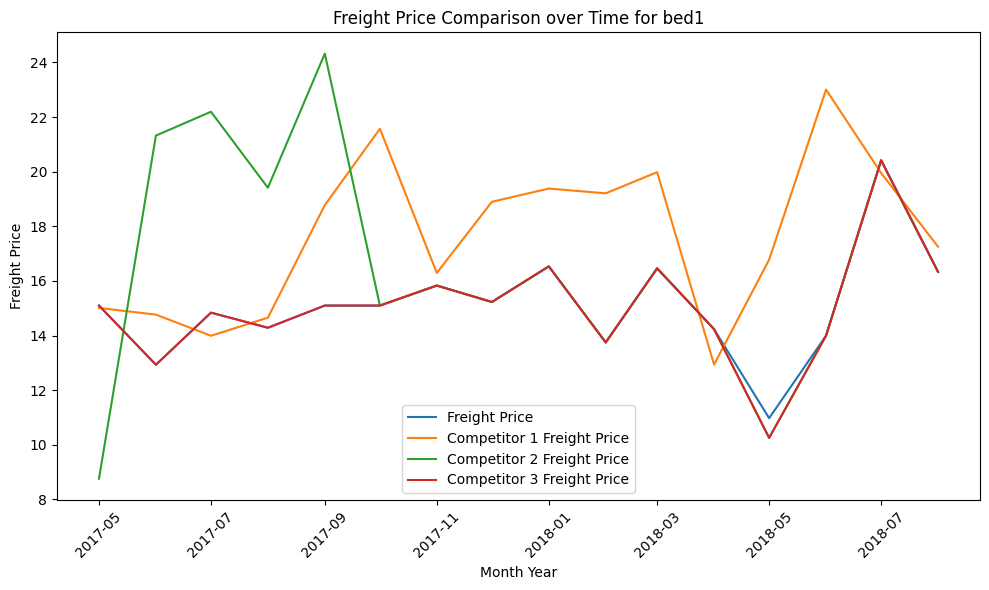

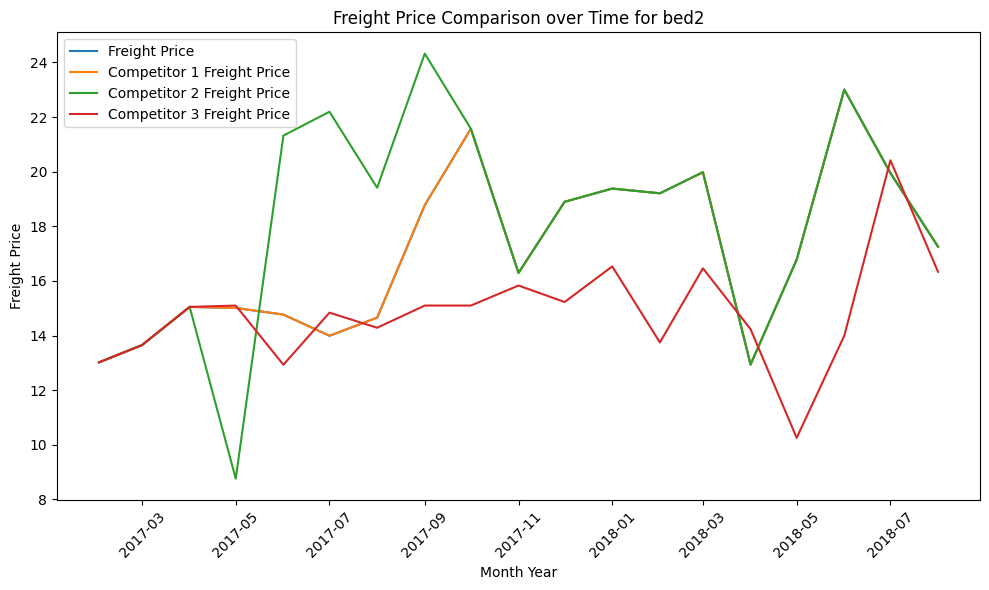

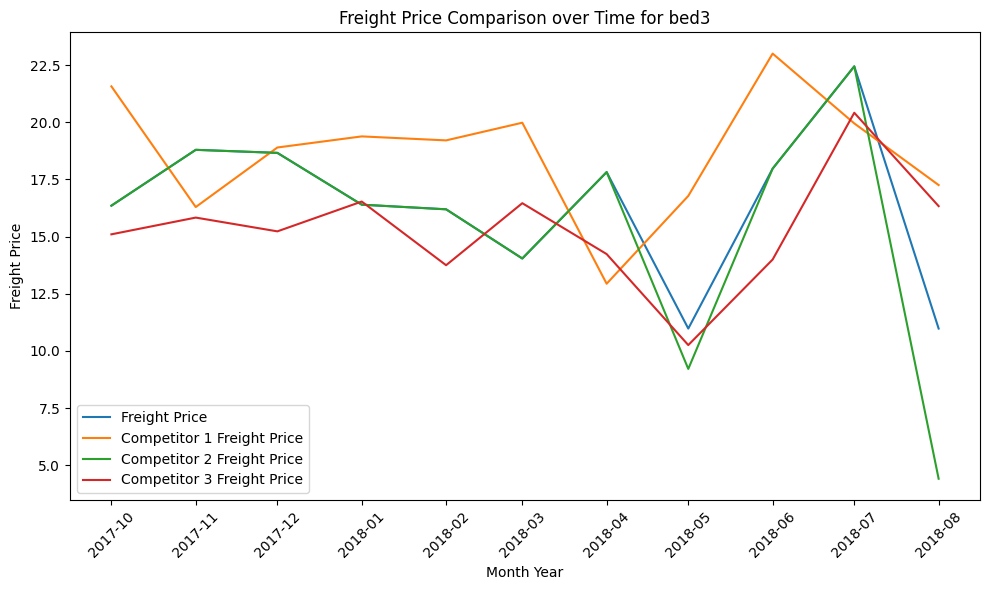

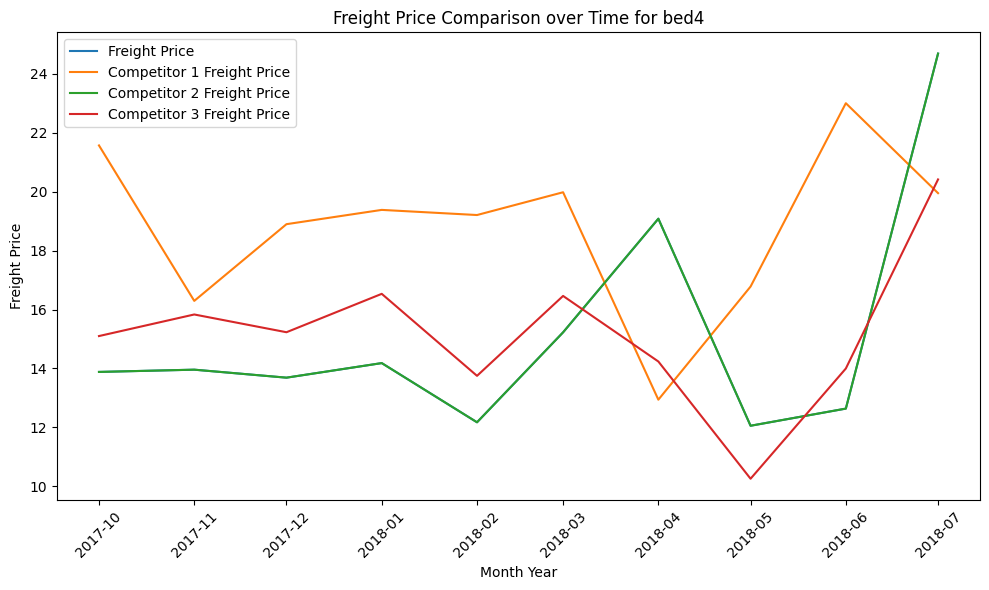

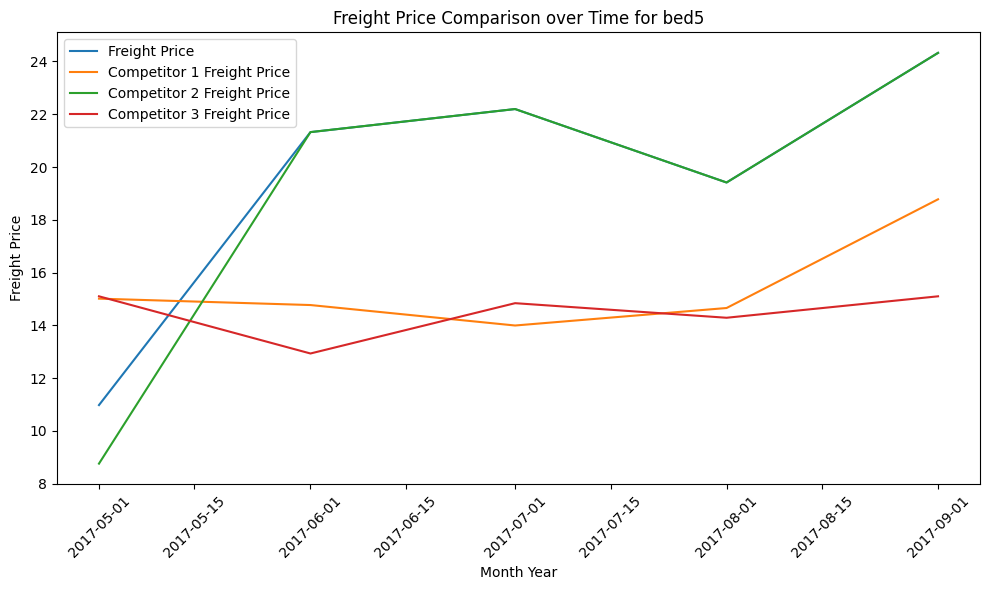

In [ ]:
# Create lineplots for freight price and comp freight prices over time for each sel. product.
for product_id in selected_products:
    product_df = grouped_df[grouped_df['product_id'] == product_id]

    plt.figure(figsize=(10, 6))
    sns.lineplot(data=product_df, x='month_year', y='freight_price', label='Freight Price')
    sns.lineplot(data=product_df, x='month_year', y='fp1', label='Competitor 1 Freight Price')
    sns.lineplot(data=product_df, x='month_year', y='fp2', label='Competitor 2 Freight Price')
    sns.lineplot(data=product_df, x='month_year', y='fp3', label='Competitor 3 Freight Price')
    plt.title(f'Freight Price Comparison over Time for {product_id}')
    plt.xlabel('Month Year')
    plt.ylabel('Freight Price')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

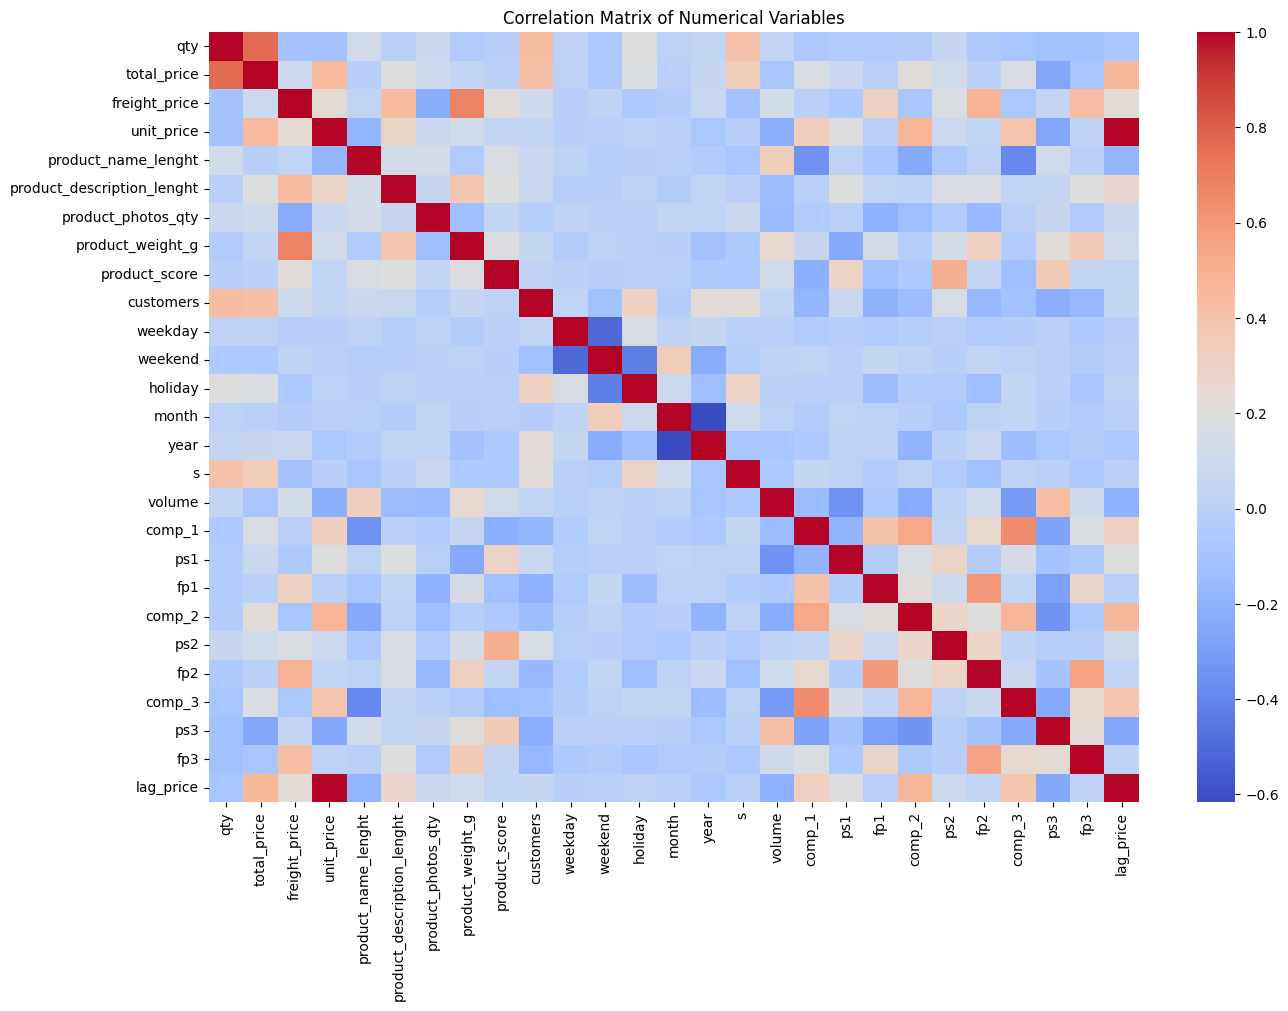

In [ ]:
# Create a heatmap to visualize the correlation matrix.
# Select only the numerical columns for correlation analysis.
numerical_df = grouped_df.select_dtypes(include=np.number)

# Calculate the correlation matrix.
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') # annot=True to show correlation values, but can clutter for many variables
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

3. Feature Engineering: Calculate additional features such as competitor price differences, temporal features, and product attributes.

In [ ]:
# Feature Engineering

# Competitor Price Differences
# Calculate price difference b/w product's unit price and each competitor's price
grouped_df['comp1_price_diff'] = grouped_df['unit_price'] - grouped_df['comp_1']
grouped_df['comp2_price_diff'] = grouped_df['unit_price'] - grouped_df['comp_2']
grouped_df['comp3_price_diff'] = grouped_df['unit_price'] - grouped_df['comp_3']

# Calculate percentage price difference as well (handle potential division by zero if competitor price is 0)
grouped_df['comp1_price_percent_diff'] = ((grouped_df['unit_price'] - grouped_df['comp_1']) / grouped_df['comp_1'].replace(0, np.nan)) * 100
grouped_df['comp2_price_percent_diff'] = ((grouped_df['unit_price'] - grouped_df['comp_2']) / grouped_df['comp_2'].replace(0, np.nan)) * 100
grouped_df['comp3_price_percent_diff'] = ((grouped_df['unit_price'] - grouped_df['comp_3']) / grouped_df['comp_3'].replace(0, np.nan)) * 100


# Temporal Features, month and year are already available as numerical features. If needed, we could extract more granular temporal features like week of year, day of week, etc but let's start with month and year for simplicity.
# Product Attributes (already present and aggregated: product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_score, volume)

# Display the first 5 rows with the new features
grouped_df.head()

,product_id,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,comp_3,ps3,fp3,lag_price,comp1_price_diff,comp2_price_diff,comp3_price_diff,comp1_price_percent_diff,comp2_price_percent_diff,comp3_price_percent_diff
0,bed1,2017-05-01,1,99.9875,15.100000,45.95,39.0,161.0,2.0,350.0,...,45.95,4.0,15.100000,45.90,-43.95,-169.050000,0.0,-48.887653,-78.627907,0.0
1,bed1,2017-06-01,3,137.8500,12.933333,45.95,39.0,161.0,2.0,350.0,...,45.95,4.0,12.933333,45.95,-43.95,-163.050000,0.0,-48.887653,-78.014354,0.0
2,bed1,2017-07-01,6,275.7000,14.840000,45.95,39.0,161.0,2.0,350.0,...,45.95,4.0,14.840000,45.95,-43.95,-159.050000,0.0,-48.887653,-77.585366,0.0
3,bed1,2017-08-01,4,183.8000,14.287500,45.95,39.0,161.0,2.0,350.0,...,45.95,4.0,14.287500,45.95,-43.95,-153.559804,0.0,-48.887653,-76.968550,0.0
4,bed1,2017-09-01,2,99.9875,15.100000,45.95,39.0,161.0,2.0,350.0,...,45.95,4.0,15.100000,45.95,-43.95,-117.448710,0.0,-48.887653,-71.878603,0.0


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

# Select the numerical features to scale
numerical_features = grouped_df.select_dtypes(include=np.number).columns.tolist()
# Create a new list of features to scale, excluding 'month_year' (datetime),'lag_price' (the target variable), and 'product_id' (categorical identifier, although not in numerical_features list)
features_to_scale = [feature for feature in numerical_features if feature not in ['month_year', 'lag_price']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected features
grouped_df[features_to_scale] = scaler.fit_transform(grouped_df[features_to_scale])

# Descriptive stats of the scaled features to verify
grouped_df[features_to_scale].describe()

,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_score,customers,...,fp2,comp_3,ps3,fp3,comp1_price_diff,comp2_price_diff,comp3_price_diff,comp1_price_percent_diff,comp2_price_percent_diff,comp3_price_percent_diff
count,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,...,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02,6.760000e+02
mean,5.781043e-17,-7.357691e-17,-2.102197e-17,4.204395e-17,1.103654e-16,-5.255494e-18,2.627747e-17,4.204395e-17,-2.160008e-15,2.102197e-17,...,2.102197e-16,5.255494e-16,-1.492560e-15,4.414615e-16,4.204395e-17,6.306592e-17,2.102197e-17,-4.204395e-17,2.102197e-17,-3.153296e-17
std,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,...,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00,1.000740e+00
min,-1.065333e+00,-9.343251e-01,-1.102053e+00,-1.045397e+00,-2.094853e+00,-1.019366e+00,-7.003436e-01,-7.687647e-01,-3.387982e+00,-1.290575e+00,...,-2.213696e+00,-1.347349e+00,-2.153704e+00,-1.861947e+00,-1.531110e+00,-2.766823e+00,-2.666379e+00,-5.934608e-01,-1.320505e+00,-9.861914e-01
25%,-8.093202e-01,-7.544191e-01,-6.608870e-01,-7.150341e-01,-9.263492e-01,-6.543244e-01,-7.003436e-01,-6.596638e-01,-8.000997e-01,-7.583999e-01,...,-6.442394e-01,-6.371124e-01,-4.378479e-01,-5.285214e-01,-3.627782e-01,-2.050474e-01,-3.127817e-01,-3.395738e-01,-3.190113e-01,-3.901050e-01
50%,-2.972936e-01,-3.893997e-01,-3.394570e-01,-2.194897e-01,2.421551e-01,-4.068905e-01,-3.480874e-01,-3.948302e-01,6.252773e-02,-3.068572e-01,...,-2.817823e-01,-5.089584e-01,-8.883871e-03,-2.618657e-01,-3.627782e-01,-1.963797e-01,-3.127817e-01,-3.395738e-01,-3.084189e-01,-3.901050e-01
75%,3.854086e-01,4.415201e-01,2.663183e-01,3.323540e-01,8.795210e-01,2.071123e-01,4.168712e-03,1.100458e-03,4.938414e-01,5.639751e-01,...,4.742786e-01,3.313185e-01,4.200802e-01,2.681727e-01,1.752274e-01,9.236458e-03,1.912648e-01,-7.983063e-02,1.238889e-03,5.276926e-02
max,2.604191e+00,2.650082e+00,2.524301e+00,3.016690e+00,1.198204e+00,3.419171e+00,4.231242e+00,3.476492e+00,1.787783e+00,4.160190e+00,...,6.014461e+00,3.593077e+00,1.706972e+00,7.101437e+00,3.829610e+00,3.529053e+00,3.530811e+00,5.186825e+00,3.634235e+00,3.717442e+00


In [ ]:
# Data Splitting (train, test)
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# Exclude 'product_id' and 'month_year' as they are identifiers and not features for the model, also the target variable 'lag_price' from the features
features = grouped_df.drop(columns=['product_id', 'month_year', 'lag_price',
                                   'comp_1', 'comp_2', 'comp_3',
                                   'ps1', 'ps2', 'ps3',
                                   'fp1', 'fp2', 'fp3']) # Dropping original competitor data as we have diff features.

target = grouped_df['lag_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42) # random_state for reproducibility

# Print the shapes of the resulting sets to verify the split (optional)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (540, 23)
Shape of X_test: (136, 23)
Shape of y_train: (540,)
Shape of y_test: (136,)


4. Model Selection: Evaluate various regression models including Random Forest, Ridge Regression, and potentially other algorithms.


In [ ]:
# Model Selection and Training

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb


# Initialize models
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # n_estimators is the number of trees in the forest
ridge_model = Ridge(alpha=1.0)                                       # alpha is the regularization strength
lr_model = LinearRegression()                                        # Initialize Linear Regression model
dt_model = DecisionTreeRegressor(random_state=42)                    # Initialize Decision Tree Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)               # Initialize Gradient Boosting Regressor model
xgb_model = xgb.XGBRegressor(random_state=42)                        # Initialize XGBoost Regressor model
svr_model = SVR()                                                    # Initialize Support Vector Regressor model
knn_model = KNeighborsRegressor()                                    # Initialize K-Nearest Neighbors Regressor model


# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Train the Ridge Regression model
ridge_model.fit(X_train, y_train)

# Train the Linear Regression model
lr_model.fit(X_train, y_train)

# Train the Decision Tree model
dt_model.fit(X_train, y_train)

# Train the Gradient Boosting Regressor model
gbr_model.fit(X_train, y_train)

# Train the XGBoost Regressor model
xgb_model.fit(X_train, y_train)

# Train the Support Vector Regressor model
svr_model.fit(X_train, y_train)

# Train the K-Nearest Neighbors Regressor model
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

5. Performance Evaluation: Use appropriate metrics such as R-squared and Mean Absolute Error to assess model performance.

In [ ]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test) # Predict using the Decision Tree model
y_pred_gbr = gbr_model.predict(X_test) # Predict using the Gradient Boosting Regressor model
y_pred_xgb = xgb_model.predict(X_test) # Predict using the XGBoost Regressor model
y_pred_svr = svr_model.predict(X_test) # Predict using the Support Vector Regressor model
y_pred_knn = knn_model.predict(X_test) # Predict using the K-Nearest Neighbors Regressor model


# Evaluate Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)


print(f"Random Forest Regression - RMSE: {rmse_rf:.2f}, R2 Score: {r2_rf:.2f}, MAE: {mae_rf:.2f}")

# Evaluate Ridge Regression
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)

print(f"Ridge Regression - RMSE: {rmse_ridge:.2f}, R2 Score: {r2_ridge:.2f}, MAE: {mae_ridge:.2f}")

# Evaluate Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr:.2f}, R2 Score: {r2_lr:.2f}, MAE: {mae_lr:.2f}")

# Evaluate Decision Tree
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

print(f"Decision Tree Regression - RMSE: {rmse_dt:.2f}, R2 Score: {r2_dt:.2f}, MAE: {mae_dt:.2f}")

# Evaluate Gradient Boosting Regressor
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor - RMSE: {rmse_gbr:.2f}, R2 Score: {r2_gbr:.2f}, MAE: {mae_gbr:.2f}")

# Evaluate XGBoost Regressor
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print(f"XGBoost Regressor - RMSE: {rmse_xgb:.2f}, R2 Score: {r2_xgb:.2f}, MAE: {mae_xgb:.2f}")

# Evaluate Support Vector Regressor
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

print(f"Support Vector Regressor - RMSE: {rmse_svr:.2f}, R2 Score: {r2_svr:.2f}, MAE: {mae_svr:.2f}")

# Evaluate K-Nearest Neighbors Regressor
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
r2_knn = r2_score(y_test, y_pred_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Regressor - RMSE: {rmse_knn:.2f}, R2 Score: {r2_knn:.2f}, MAE: {mae_knn:.2f}")

Random Forest Regression - RMSE: 8.92, R2 Score: 0.99, MAE: 4.18
Ridge Regression - RMSE: 9.34, R2 Score: 0.98, MAE: 4.98
Linear Regression - RMSE: 9.41, R2 Score: 0.98, MAE: 5.01
Decision Tree Regression - RMSE: 11.72, R2 Score: 0.98, MAE: 5.63
Gradient Boosting Regressor - RMSE: 8.38, R2 Score: 0.99, MAE: 4.29
XGBoost Regressor - RMSE: 8.54, R2 Score: 0.99, MAE: 4.11
Support Vector Regressor - RMSE: 66.76, R2 Score: 0.21, MAE: 41.97
K-Nearest Neighbors Regressor - RMSE: 19.82, R2 Score: 0.93, MAE: 14.13


In [ ]:
# Hyperparameter tuning the XGBoost Regressor.
# Define the hyperparameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

In [ ]:
#GridSearchCV to train and evaluate xgb w diff hyperparameter combinations.
from sklearn.model_selection import GridSearchCV

# Initialize an XGBoost Regressor model
xgb_model_tuned = xgb.XGBRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model_tuned, param_grid=param_grid_xgb, cv=5, scoring='r2', n_jobs=-1) # n_jobs=-1 to use all available cores

# Fit grid_search to the training data
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters found by the grid search
print("Best parameters:", grid_search_xgb.best_params_)

# Print the best cross-validation score
print("Best cross-validation R2 score:", grid_search_xgb.best_score_)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Best cross-validation R2 score: 0.9894172707385234


In [ ]:
# Evaluate the tuned XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_ # Get the best model from GridSearchCV
y_pred_tuned_xgb = best_xgb_model.predict(X_test)

rmse_tuned_xgb = np.sqrt(mean_squared_error(y_test, y_pred_tuned_xgb))
r2_tuned_xgb = r2_score(y_test, y_pred_tuned_xgb)
mae_tuned_xgb = mean_absolute_error(y_test, y_pred_tuned_xgb)

print(f"Tuned XGBoost Regression - RMSE: {rmse_tuned_xgb:.2f}, R2 Score: {r2_tuned_xgb:.2f}, MAE: {mae_tuned_xgb:.2f}")

Tuned XGBoost Regression - RMSE: 7.93, R2 Score: 0.99, MAE: 4.43


6. Model Explainability: Implement techniques like SHAP values and Permutation Importance to interpret the model's decisions.


In [ ]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(best_xgb_model, X_test, y_test, random_state=42, n_repeats=10)

# Print the permutation importances
print("Permutation Importances:")
for i in perm_importance.importances_mean.argsort()[::-1]: # Sorting the features by their importance in descending order
    print(f"{X_test.columns[i]}: {perm_importance.importances_mean[i]:.4f}")

Permutation Importances:
unit_price: 1.7902
total_price: 0.0014
product_name_lenght: 0.0010
comp2_price_percent_diff: 0.0009
comp2_price_diff: 0.0007
product_weight_g: 0.0005
s: 0.0004
month: 0.0003
product_score: 0.0002
weekday: 0.0001
weekend: 0.0001
year: 0.0000
volume: -0.0000
qty: -0.0000
product_description_lenght: -0.0000
product_photos_qty: -0.0000
comp3_price_percent_diff: -0.0001
holiday: -0.0001
comp1_price_percent_diff: -0.0001
customers: -0.0002
comp1_price_diff: -0.0003
comp3_price_diff: -0.0004
freight_price: -0.0006


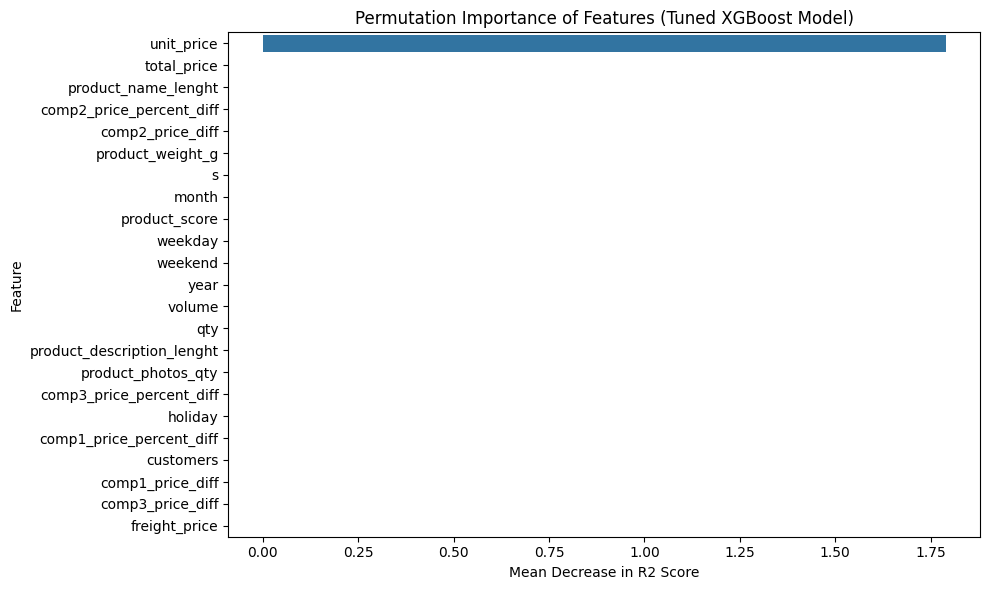

In [ ]:
# Create a DataFrame for easier plotting
feature_names = X_test.columns
perm_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Visualize permutation importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Importance of Features (Tuned XGBoost Model)')
plt.xlabel('Mean Decrease in R2 Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Calc. SHAP values (SHapley Additive exPlanations) to understand feature contributions to individual predictions.
import shap

# Create a SHAP explainer object for the best_xgb_model
explainer = shap.TreeExplainer(best_xgb_model)

# Calculate SHAP values for the test dataset
shap_values = explainer.shap_values(X_test)

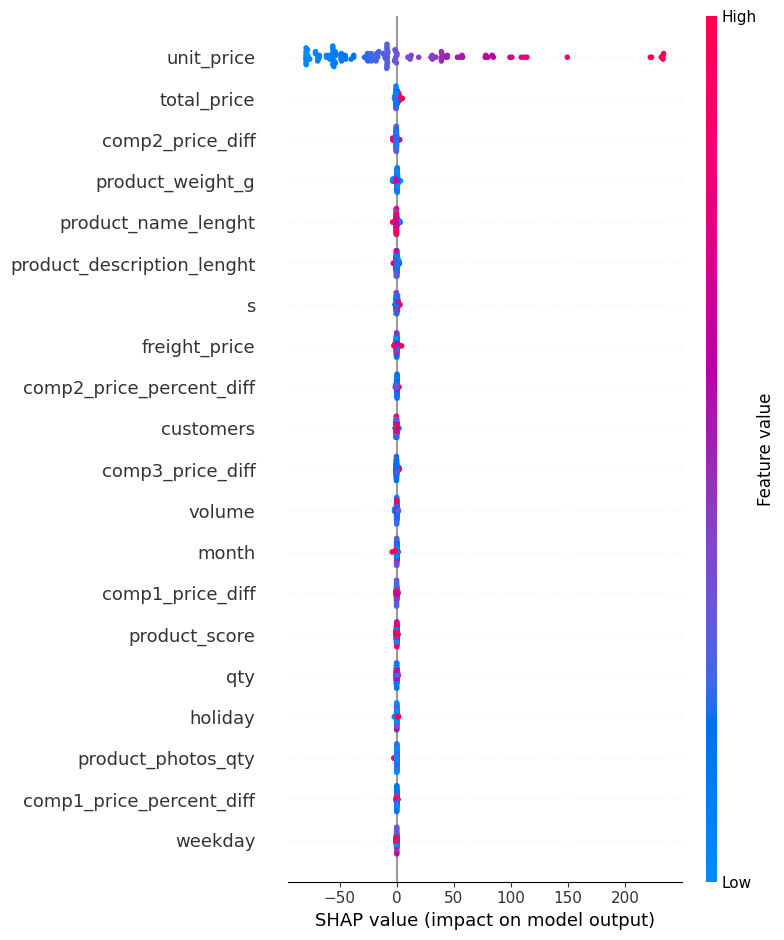

In [ ]:
# Create a SHAP summary plot
shap.summary_plot(shap_values, X_test)

7. Visualization: Create clear and informative visualizations to communicate pricing trends (already done in EDA), competitor analysis (already done in EDA), and model predictions.


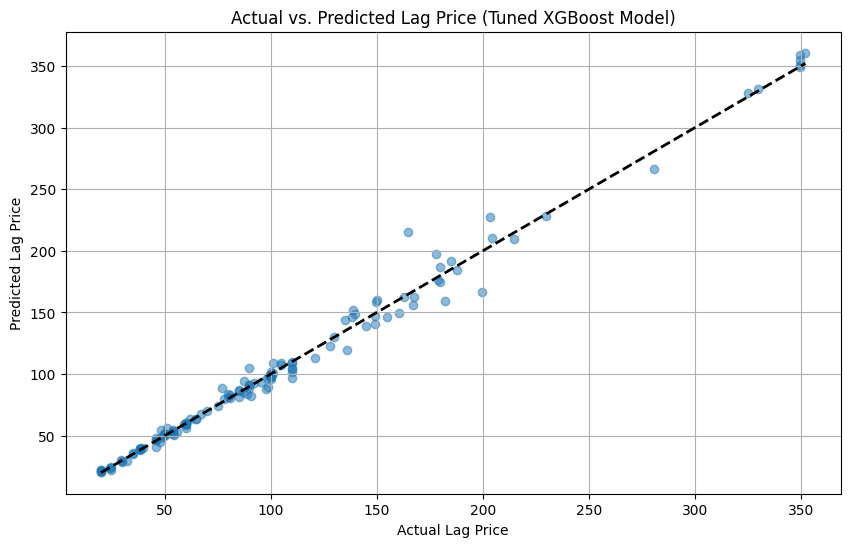

In [ ]:
# Visualize Actual vs. Predicted lag_price (using the tuned XGBoost model)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_tuned_xgb, alpha=0.5) # Scatter plot of actual vs. predicted values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line for perfect predictions
plt.xlabel('Actual Lag Price')
plt.ylabel('Predicted Lag Price')
plt.title('Actual vs. Predicted Lag Price (Tuned XGBoost Model)')
plt.grid(True)
plt.show()